# <center> <font color='red'>Banking and Finance Project </font></center>

• <b>DOMAIN</b>: Banking and finance<br>

• <b>CONTEXT</b>: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base where majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing
department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.<br>

• <b>DATA DESCRIPTION</b>: The data consists of the following attributes:
1. ID: Customer ID
2. Age: Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.

• <b>PROJECT OBJECTIVE</b>: Build an AIML model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.

## Importing the necessary libraries

In [1]:
import numpy as np # For mathematical operations
import pandas as pd # For working with dataframes and manipulating them
import matplotlib.pyplot as plt # For visualisation
import seaborn as sns # For advanced visualization
sns.set_style("darkgrid")
pd.set_option('display.max_columns',100)

# For statistical analysis of the data
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, MinMaxScaler # For scaling the data
# For spliting and tuning the data
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression # Importing Logistic Regression algorithm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
# Various metrics to evaluate the performance of our models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix, plot_roc_curve

# For sampling the data to balance the classes
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from imblearn.combine import SMOTETomek

from sklearn.pipeline import make_pipeline, Pipeline
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['axes.labelsize'] = 18.
plt.rcParams['xtick.labelsize'] = 14.
plt.rcParams['ytick.labelsize'] = 14.
plt.rcParams['figure.figsize'] = [12.,8.]
plt.rcParams['legend.fontsize'] = 12.

<a id='1'></a>
## 1. Import and warehouse data:

In [3]:
df1 = pd.read_csv('Part2 - Data1.csv') # Importing the first file

In [4]:
df1.head() # Taking the idea of the file

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [5]:
df1.shape # Checking its shape

(5000, 8)

We have 5000 rows and 8 columns in this file

In [6]:
df1.size # Checking the file's size

40000

In [7]:
df2 = pd.read_csv('Part2 -Data2.csv') # Importing the second file

In [8]:
df2.head() # Taking the idea of columns of the file

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [9]:
df2.shape # Checking the shape of the file

(5000, 7)

We have 5000 rows and 7 columns in this file

In [10]:
df2.size # Checking its size

35000

In [11]:
df = pd.merge(df1,df2,how='outer',on='ID') # Warehousing the both files into one dataframe

In [12]:
df.shape # Checking the shape of the combined dataframe

(5000, 14)

We have 5000 rows and 14 columns in our warehoused data.

In [13]:
df.size # Checking the size of the combined dataframe

70000

<a id='2'></a>
## 2. Data cleansing:

In [14]:
df.dtypes # Let's check the data-types of every columns of our dataframe

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [15]:
df.head() #Let's cross check the data-types with the actual values in the file

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


Except for the last column, which is also our target variable, data-type of all the other columns seems okay.

In [16]:
df.isnull().sum() # Let's check the null-values in our dataset

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

LoanOnCard is our target variable and it has 20 missing values, I think it is wise to drop them since imputing it with some random value would greatly affect the prediction ability of the data-set. Hence, we are dropping those rows from our dataframe.

Since we have 5000 observations and dropping 20 rows means dropping 0.4% observations would hardly affect the prediction capability of our data.

In [17]:
df = df.dropna() # Dropping missing values from our dataframe

Now, let's make our target variable integer instead of a float

In [18]:
df['LoanOnCard'] = df['LoanOnCard'].astype(int)

In [19]:
df.shape # Shape of the dataframe after dropping the missing values

(4980, 14)

In [20]:
df.describe().T # Let's check the columns using statistics

,count,mean,std,min,25%,50%,75%,max
ID,4980.0,2510.345382,1438.011129,10.0,1265.75,2510.5,3755.250,5000.0
Age,4980.0,45.352610,11.464212,23.0,35.00,45.0,55.000,67.0
CustomerSince,4980.0,20.117671,11.468716,-3.0,10.00,20.0,30.000,43.0
HighestSpend,4980.0,73.852410,46.070090,8.0,39.00,64.0,98.000,224.0
ZipCode,4980.0,93152.420482,2123.660073,9307.0,91911.00,93407.0,94608.000,96651.0
HiddenScore,4980.0,2.395582,1.147200,1.0,1.00,2.0,3.000,4.0
MonthlyAverageSpend,4980.0,1.939536,1.750006,0.0,0.70,1.5,2.525,10.0
Level,4980.0,1.880924,0.840144,1.0,1.00,2.0,3.000,3.0
Mortgage,4980.0,56.589759,101.836758,0.0,0.00,0.0,101.000,635.0
Security,4980.0,0.104418,0.305832,0.0,0.00,0.0,0.000,1.0


This tells us that some of the variables are categorical but masked as numerical variables such as:
* HiddenScore : It has a range from 1 to 4
* Level : It is a range from 1 to 3
* Security : It is a binary number with only 0 and 1 numbers
* FixedDepositAccount : It is a binary number with only 0 and 1 numbers
* InternetBanking : It is a binary number with only 0 and 1 numbers
* CreditCard : It is a binary number with only 0 and 1 numbers
* LoanOnCard : It is a binary number with only 0 and 1 numbers

So, let's re-arrange our columns where all continuous variables are together and all categorical variables are together. This would make it easy to do analysis of the data.

In [21]:
df = df[['ID','ZipCode','Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage',
'HiddenScore','Level','Security','FixedDepositAccount','InternetBanking','CreditCard','LoanOnCard']]

In [22]:
df.head() # Let's take a look at re-arranged columns in the dataframe

,ID,ZipCode,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage,HiddenScore,Level,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,10,93023,34,9,180,8.9,0,1,3,0,0,0,0,1
10,11,94710,65,39,105,2.4,0,4,3,0,0,0,0,0
11,12,90277,29,5,45,0.1,0,3,2,0,0,1,0,0
12,13,93106,48,23,114,3.8,0,2,3,1,0,0,0,0
13,14,94920,59,32,40,2.5,0,4,2,0,0,1,0,0


I have done superficial cleansing of the data. For deeper cleansing, we first need to do deeper analysis and as we do analysis, if I come across any anomaly, I will tackle it then and there.

<a id='3'></a>
## 3. Data analysis & visualisation:

Now, let's check the mean, standard deviation and 5-point summary of our continuous variables.

Note: I have excluded ZipCode and ID since it doesn't make sense to take mean or 5-point summary of them

In [23]:
df.iloc[:,2:7].describe()

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage
count,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000
mean,45.352610,20.117671,73.85241,1.939536,56.589759
std,11.464212,11.468716,46.07009,1.750006,101.836758
min,23.000000,-3.000000,8.00000,0.000000,0.000000
25%,35.000000,10.000000,39.00000,0.700000,0.000000
50%,45.000000,20.000000,64.00000,1.500000,0.000000
75%,55.000000,30.000000,98.00000,2.525000,101.000000
max,67.000000,43.000000,224.00000,10.000000,635.000000


Here, we can see that Age seems normally distributed with mean and median being almost the same.
Same with the CustomerSince column.

HighestSpend column seems right skewed with mean being more than the median and also has a high standard deviation. Practically, this makes sense since it is a general tendency of humans to save more and spend less. Only a few wealthy ones spend more and this exactly is reflected in the data-set.

Same is the case with MonthlyAverageSpend of the people, but it is masked. It seems the masking is done on the scale of 0 to 10, where we can assume that 0 being no spendings and 10 being maximum spending. Here too, median is at 1.5 which means most of the people are on the saving side than on the spending side.

Mortgage columns seems very highly skewed, where out of 4980 people, atleast half of them have not mortgage anything. It can mean that either they have taken small loans which don't require mortgaging anything or haven't taken any loan, in which case, they are kind of liability over the bank.

I left <b>ZipCode</b> above since it doesn't make sense to see the mean or standard deviation or the 5-point summary of ZipCode, since these are the unique code given to a place. What would be interesting to see whether there is a particular location where this bank has a considerable customer base. So, let's find out the frequency of ZipCode.

In [24]:
df.ZipCode.astype(object).describe()

count      4980
unique      467
top       94720
freq        167
Name: ZipCode, dtype: int64

As can be seen that there are 467 unique elements in this column, which means the bank has customer base across 467 different locations. But we can't just yet conclude it. Let's check whether all the entries are entered correctly. Let's find out the distribution of ZipCode.

<AxesSubplot:xlabel='ZipCode'>

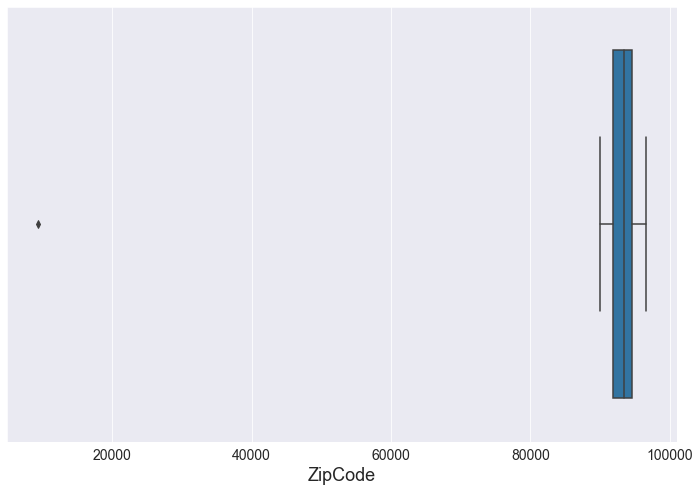

In [25]:
sns.boxplot(data=df,x='ZipCode')

It seems that one entry has been wrongly entered. We can impute the appropriate value in place of that but would the ZipCode column start giving valuable information after imputing this value? We still have 466 unique ZipCodes means codes of 466 different locations.

So, out of curiosity, I tried bucketing the ZipCodes after imputing the appropriate value for this anomaly in the ZipCode and tried to find out whether it became more informative after that or not. But as it turns out, not only it wasn't informative even after that but also when I performed the statistical test over bucketed ZipCodes w.r.t. LoanOnCard, it wasn't statistically significant by a wide margin. 

Also, common sense tells that bucketing values of ZipCode would not help since ZipCodes can't tell much unless we know whether these are real ZipCodes or not and where these locations are. Until we know the locations, we can't bucket them just based on these codes. 

Hence, in my opinion, all this effort is not worth showing here and this column isn't of any use in the prediction of our model. Hence, from here on, we won't consider this column as our predictor column and won't perform any analysis over this.

<b>Now, let's check the frequencies and number of unique values in each categorical variable:

In [26]:
df.iloc[:,7:].astype(object).describe()

,HiddenScore,Level,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,4980,4980,4980,4980,4980,4980,4980
unique,4,3,2,2,2,2,2
top,1,1,0,0,1,0,0
freq,1466,2089,4460,4678,2974,3514,4500


We can see that the columns <b>Security, FixedDepositAccount, CreditCard and LoanOnCard (Which is also our target variable)</b> are highly skewed towards one or the other value and has a remarkable imbalance in them. I have discussed it in detail after the univariate visualization.

<b>Let's do univariate analysis:

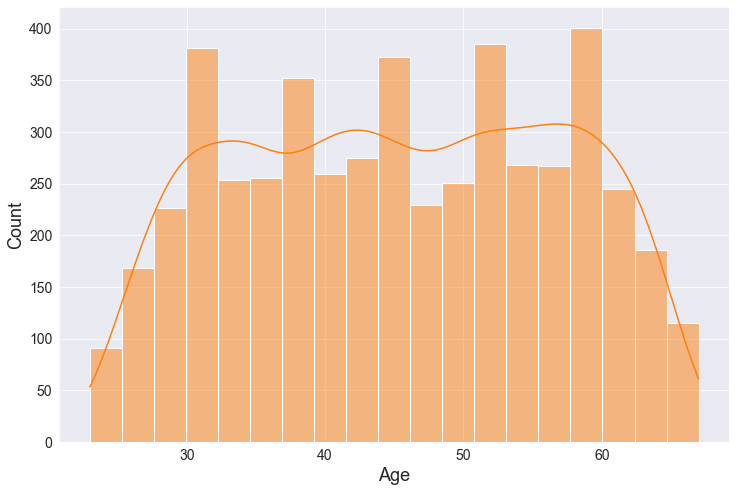

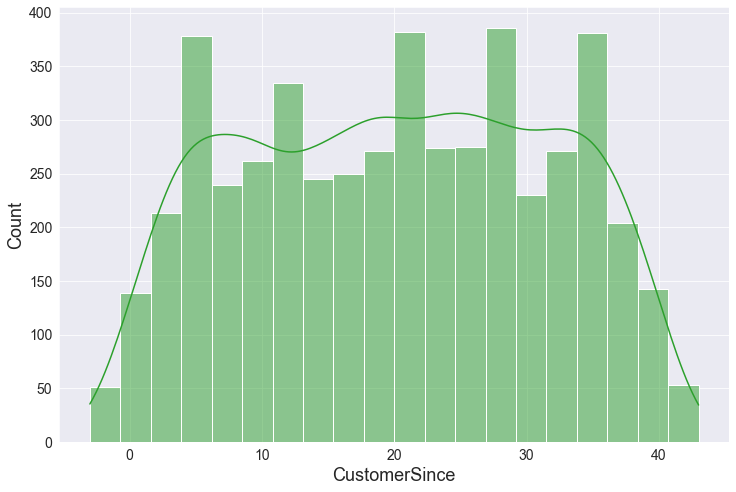

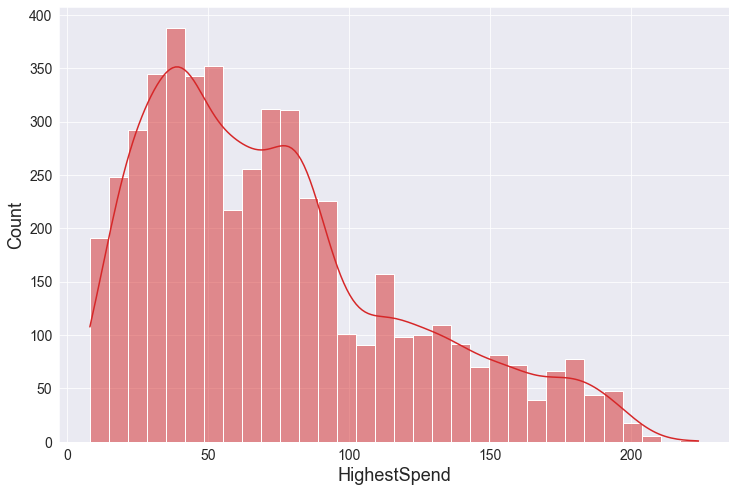

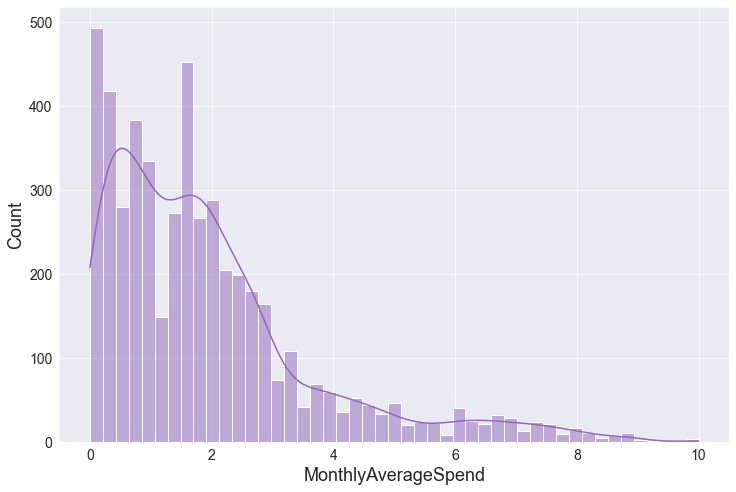

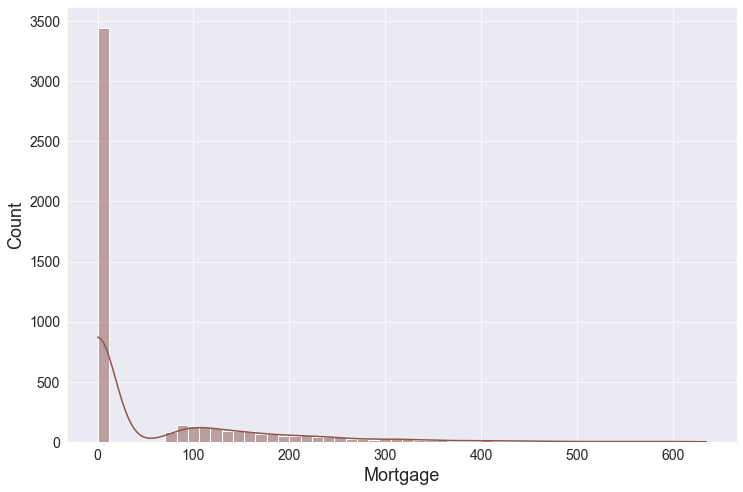

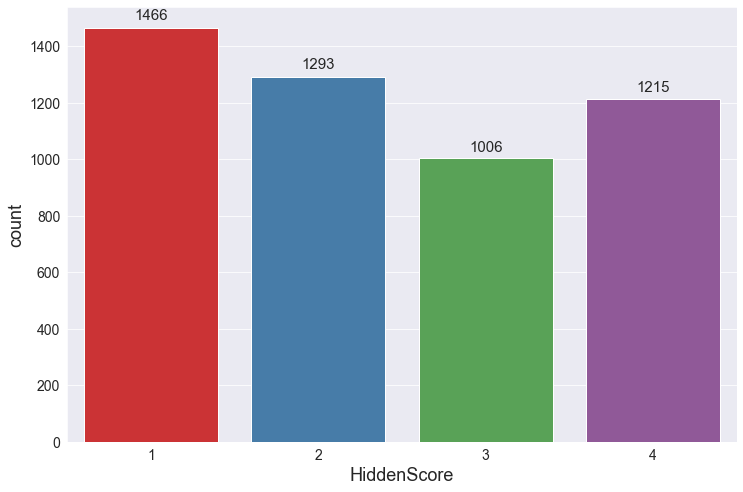

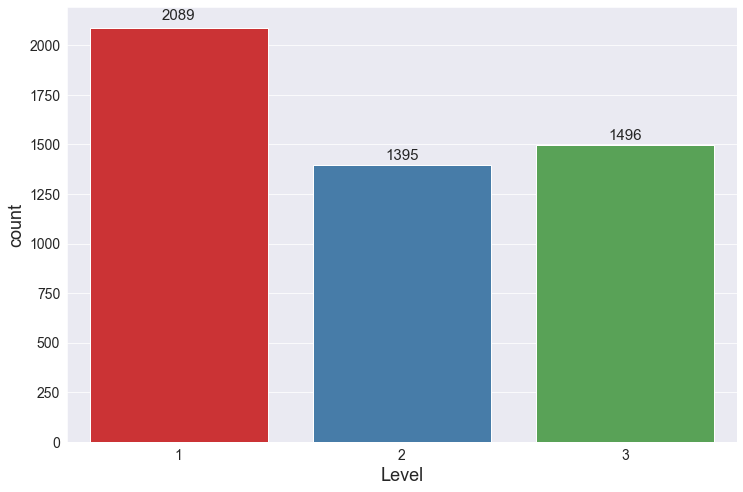

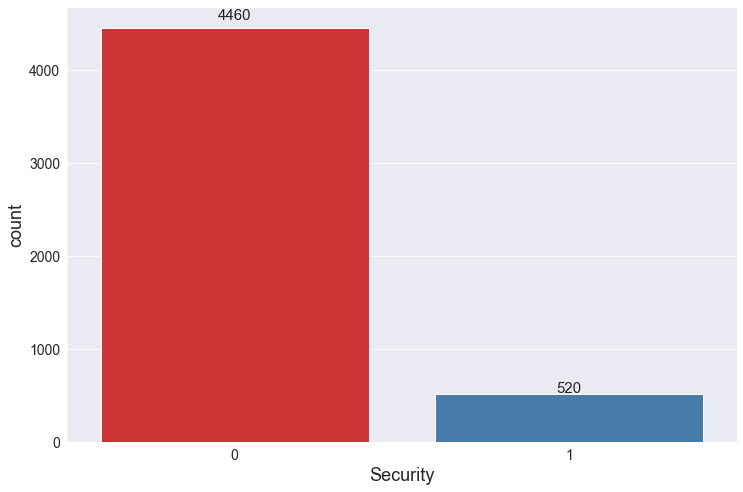

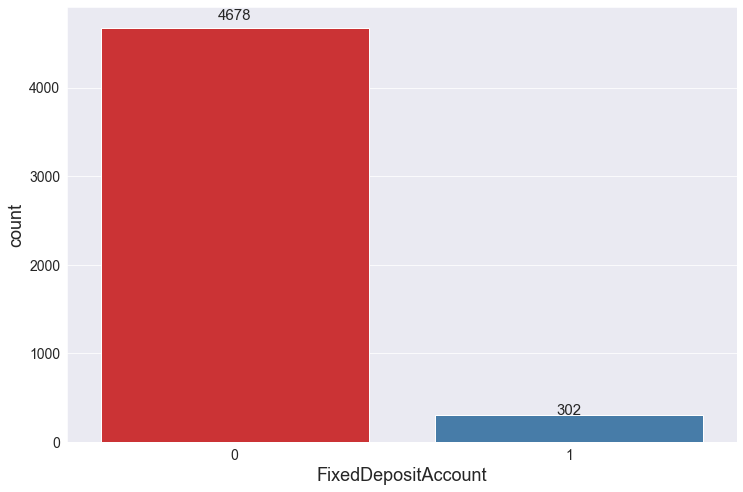

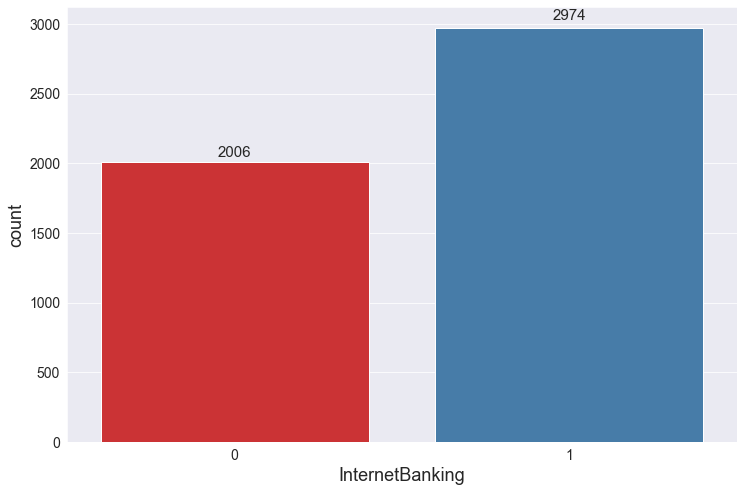

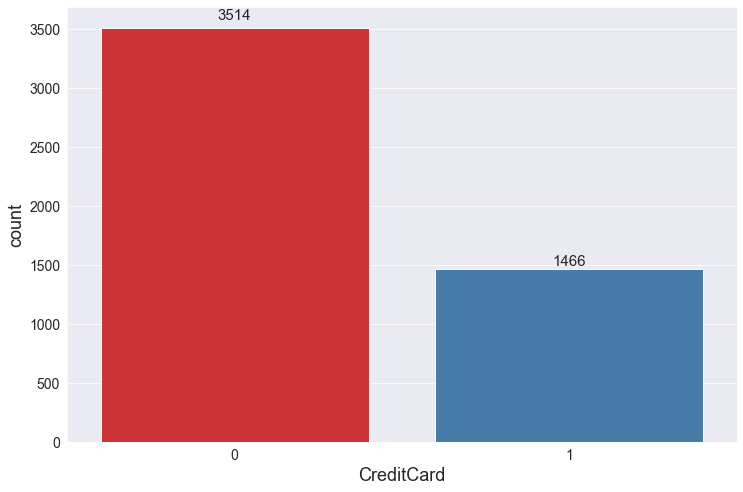

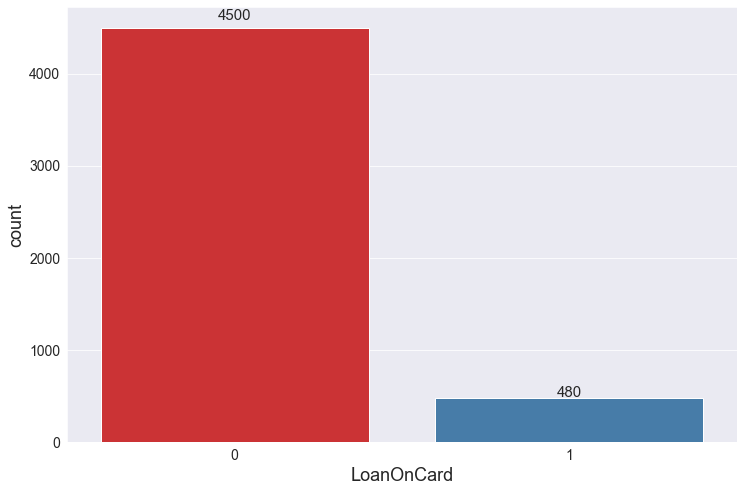

In [27]:
cols = [x for x in df.columns if x not in ['ID','ZipCode']]
k=1
for i in cols[:-7]:
    sns.histplot(data=df,x=i,kde=True,color=sns.color_palette()[k])
    k+=1
    plt.show()
    
for i in cols[-7:]:
    fig , ax = plt.subplots()
    bar = sns.countplot(data=df,x=i,ax=ax,palette='Set1')
    for j in bar.patches: #label each rectangle
        height = j.get_height()
        ax.text(j.get_x()+j.get_width()/2,height*1.02,height,ha="center",fontsize=15)
    plt.show()

<center><b>Univariate Analysis of the Continous Variables</b></center>

We can see that <b>Age and CustomerSince</b> are quite symmetrically normally distributed.
It shows that the bank has good number of young as well as old-aged customers. Also, the bank has newly joined customers and the customers for a long time. This gives us the idea that bank may have a good retention rate of the customers. 

From the columns <b>HighestSpend and MonthlyAverageSpend</b>, we can see that they are right skewed, which is understandable as discussed before. That first of all, only a few have the higher income slabs, so only a few have a higher spending capacity. Secondly, the general tendency of the people is to save and spend less. So, even not all wealthy ones have the habit of spending extravagently. Secondly, in general, Businesses have daily transactions of deposit and withdrawl and in general high spendings, whereas, individuals neither are allowed by the bank, nor have such a frequency and level of spendings. Hence, we see both these columns skewed towards the right since most of the people fall in the lower range of these values. <b>Doing any change in them might change the characterstics of these columns and we are always going to find these two columns skewed and will have some outliers.</b>

Then we the column <b>Mortgage</b>, which is highly skewed towards the right. Again, it is quite obvious that not all people take loans. Rather, it is a general tendency of the people to spend as per their capacity and not to take loans until it is necessary to take. Whereas, it is seen that Businesses take loans more often than the individual people. But since most of the features are masked by the bank in the data-set to protect the privacy of their employees, we can't really tell which ones are business accounts and which are individual accounts.<br>

<br>
<center><b>Univariate Analysis of the Categorical Variables</b></center>

We can see that the columns <b>HiddenScore and Level</b> don't have high imbalance in their distribution of frequecies. These may be for bank's internal assessment and can not really comment on these two columns. Right now, they seem arbitary but it is only after bivariate and multi-variate analysis that we can conclude that these are arbitary or follows some pattern which is relevant to us in predicting whether people taking loan needs to have certain HiddenScore or be at a certain Level or not.

From the columns <b>Security and FixedDepositAccount</b>, we can see that not many people have either security deposit lockers or fixed deposit accounts, which also from the common knowledge of the banks can be understood. Only a few people like to deposit their valuables in the deposit lockers of the banks since it's a little hectic when they need them on occassions. Also it is not safe to carry it to deposit and withdrawl everytime you need it. Similarly, people don't like to block their money for a period of time even if it earns high interest rate. Hence, we can see these two columns also follow the common trend as we see in general.

From the column <b>InternetBanking</b>, we can see that the bank is tech savvy and so are its customers. Moreover, the bank is interested in leveraging the inception of technology in the masses wants to cut its physical liabilities.

From the column <b>CreditCard</b>, we can see that it also follows the general trend. Not only not all people are eligible for a credit card but also not all people, who are eligible, opt for it. Since it always brings in the risk of making us extravagent in spendings. Nevertheless, here are over 25% people have the Credit Card, which seems a very good number of people opting for it.

From the column <b>LoanOnCard</b>, which is also our target variable, we can see that it is highly skewed in the sense that not taking any loan dominates this column than the ones taking the loan. Again, from our common understanding, this is also obvious.

But the bank's goal is to increase the number of people taking loan and our job is to enable them in the best possible way.




<b>Let's quantify our observation of skewness of our continuous variables.

In [28]:
df.iloc[:,2:7].skew()

Age                   -0.030794
CustomerSince         -0.027884
HighestSpend           0.839524
MonthlyAverageSpend    1.596001
Mortgage               2.102030
dtype: float64

As we can see that <b>MonthlyAverageSpend and Mortgage</b> columns have high skewness as observed in the distribution of these columns in the histogram above.

Let's just keep these columns as it is and see how they react during bivariate analysis.

<b>Let's see how much information we are able to gather from our bivariate analysis.</b>

Let's start with bivariate analysis of our continuous variables.

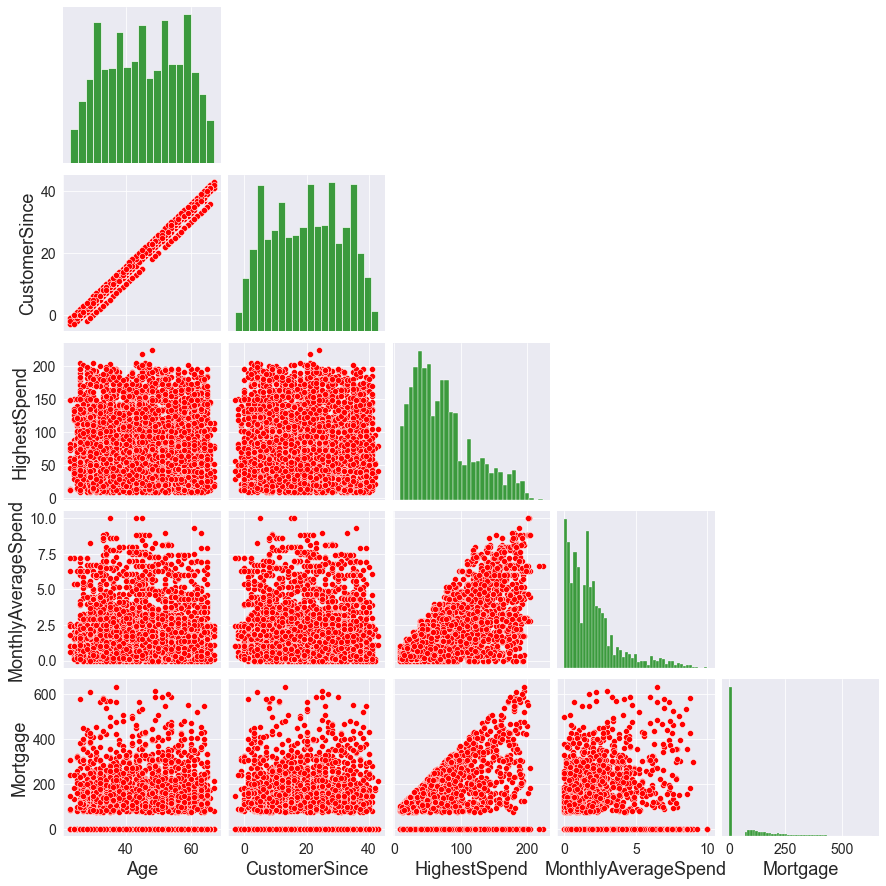

In [29]:
sns.pairplot(df.iloc[:,2:-7],plot_kws={'color':'red'},diag_kws={'color':'green'},corner=True)

<b>Bivariate visualization of continuous variables has actually thrown up interesting observations.</b>

* <b>Age and CustomerSince</b> columns are showing perfect collinearity or very strong correlation. That means that in our model building exercise, even if we drop one of these two columns, no information would be lost since both are carrying the same information. It also shows that younger people have joined the bank recently and older people have been the bank's customers for a long time, i.e., no older person has joined the bank recently. <b>Which in a way we could say that bank should focus more on younger people since they seem more interested in joining the bank in the recent times than the older people</b>. It also makes sense since from our univariate analysis, we saw that company is interested in expanding its services via technology and younger generation feels at much ease with the growing technology than the older people. 

* <b>MonthlyAverageSpend and HighestSpend</b> seems to have strong correlation but not as strong as was between Age and CustomerSince. It is also not a surprise since common sense dictates these two columns should have high correlation. It seems like as the values of both MonthlyAverageSpend and HighestSpend are increasing, the variance in their relation is increasing. This may be due to the skewness in both the columns.

* In <b>(Mortgage, HighestSpend) and (Mortgage, MonthlyAverageSpend)</b>, similar trend can be seen where even though they have high correlation, as they are increasing, the variance in their relation is increasing. Again, this could be due to the highly skewed data that we have. 

We can quantify our observations by finding the correlation values for each continuous variable with one another.

<AxesSubplot:>

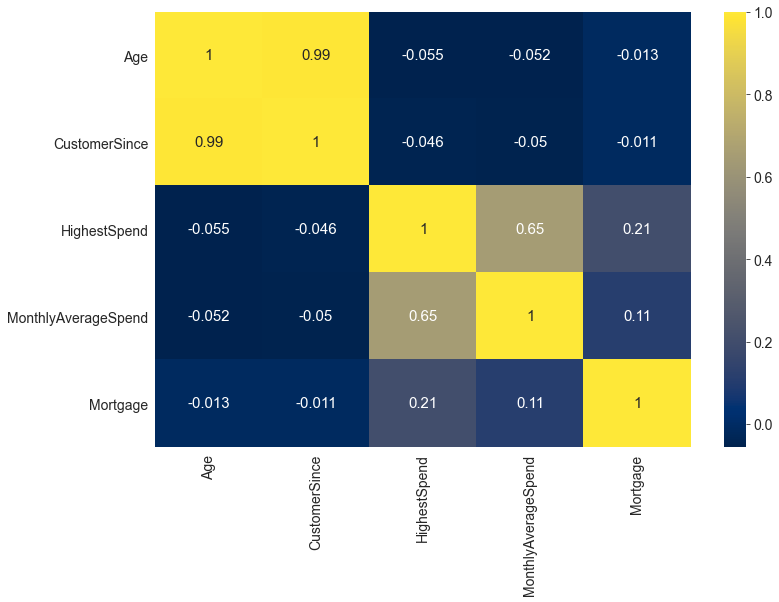

In [30]:
sns.heatmap(data=df.iloc[:,2:-7].corr(),annot=True,cmap='cividis',annot_kws={'size':15})

From this correlation matrix, we can see that first two conclusions that we made from the above visualization have been proved to be right, whereas, the observation made on the Mortgage in terms of MonthlyAverageSpend and HighestSpend columns defy our observations. This is also due to very high skewness in the Mortgage column.

Let's see Mortgage columns more closely:

<AxesSubplot:xlabel='Mortgage'>

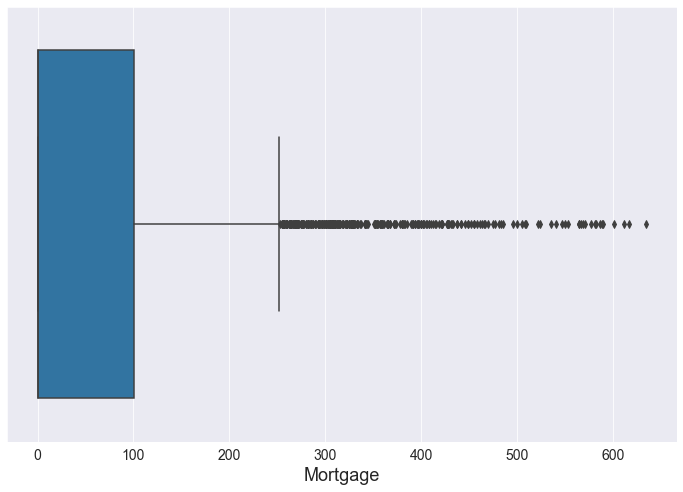

In [31]:
sns.boxplot(data=df,x='Mortgage')

Let's just try, for the sake of understanding, to take that skewness out of Mortgage column and see how the correlation values change. 

<AxesSubplot:>

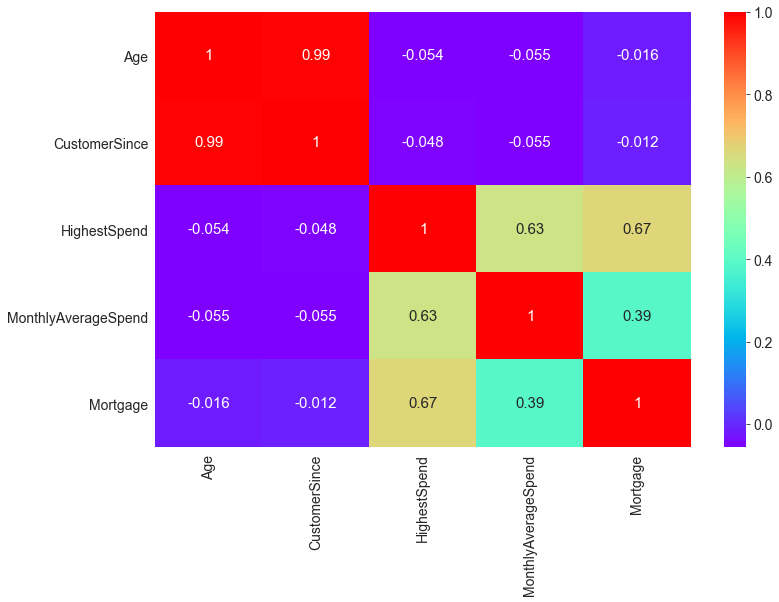

In [32]:
mort = df[df['Mortgage'] > 0].copy(deep=True)
sns.heatmap(data=mort.iloc[:,2:-7].corr(),annot=True,cmap='rainbow',annot_kws={'size':15})

As we can see that when we took the skewness out of Mortgage column, the correlation between Mortgage and (MonthlyAverageSpend, HighestSpend) have dramatically increased, as we saw in our visualization. But at what cost is it coming? This is coming at after the reduction of around 70% observations in our original data-set as seen below from the shape of mort dataframe. 

In [33]:
mort.shape

(1533, 14)

This actually raises a question, whether we should continue considering Mortgage column as a continuous variable since nearly 70% of the values in this column are 0 or should we convert it into a categorical variable and try to bucket the values into appropriate bins to gain more information from this column? In my opinion, in categorical way, this feature would be really helpful. Otherwise, in any analysis of Mortgage columns, people who haven't mortgage anything i.e., 0 value, are going to dominate over all other. 

So, let's make another feature of Mortgage_cat and bucket the values of Mortgage into appropriate bins.

In [34]:
cut_bins = [0,50,200,400,700]
bin_labels = ['0','>200','200-400','<400']
df['Mortgage_cat'] = pd.cut(df['Mortgage'],bins=cut_bins,include_lowest=True,labels=bin_labels)

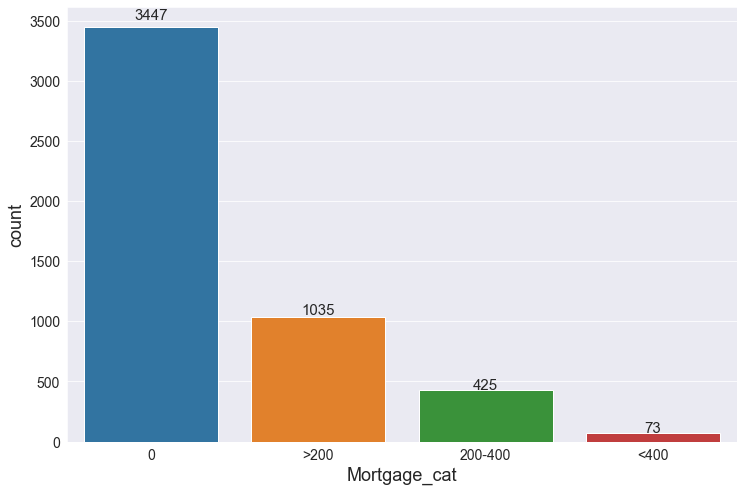

In [35]:
fig,ax = plt.subplots()
bar = sns.countplot(data=df,x='Mortgage_cat',ax=ax)
for j in bar.patches: 
    height = j.get_height()
    ax.text(j.get_x()+j.get_width()/2,height*1.02,height,ha="center",fontsize=15)

We can view these bins as No Mortgage, Low Mortgage, Medium Mortgage and High Mortgage.

<b>Now, let's do the bivariate analysis between the categorical variables:

We have 8 categorical columns and individually doing analysis for every permutation of combination of 2 categorical variables not only would be exhausting but also would be unyielding. So, let's just visualize all the combinations in the matrix of subplots and look for patterns and trends. If we find any, we would individually visualize them and will try to deduce what it could mean.

Also, let's exclude our target variable, LoanOnCard, since we are going to do separate analysis on it. Let's just take predictor categorical variables

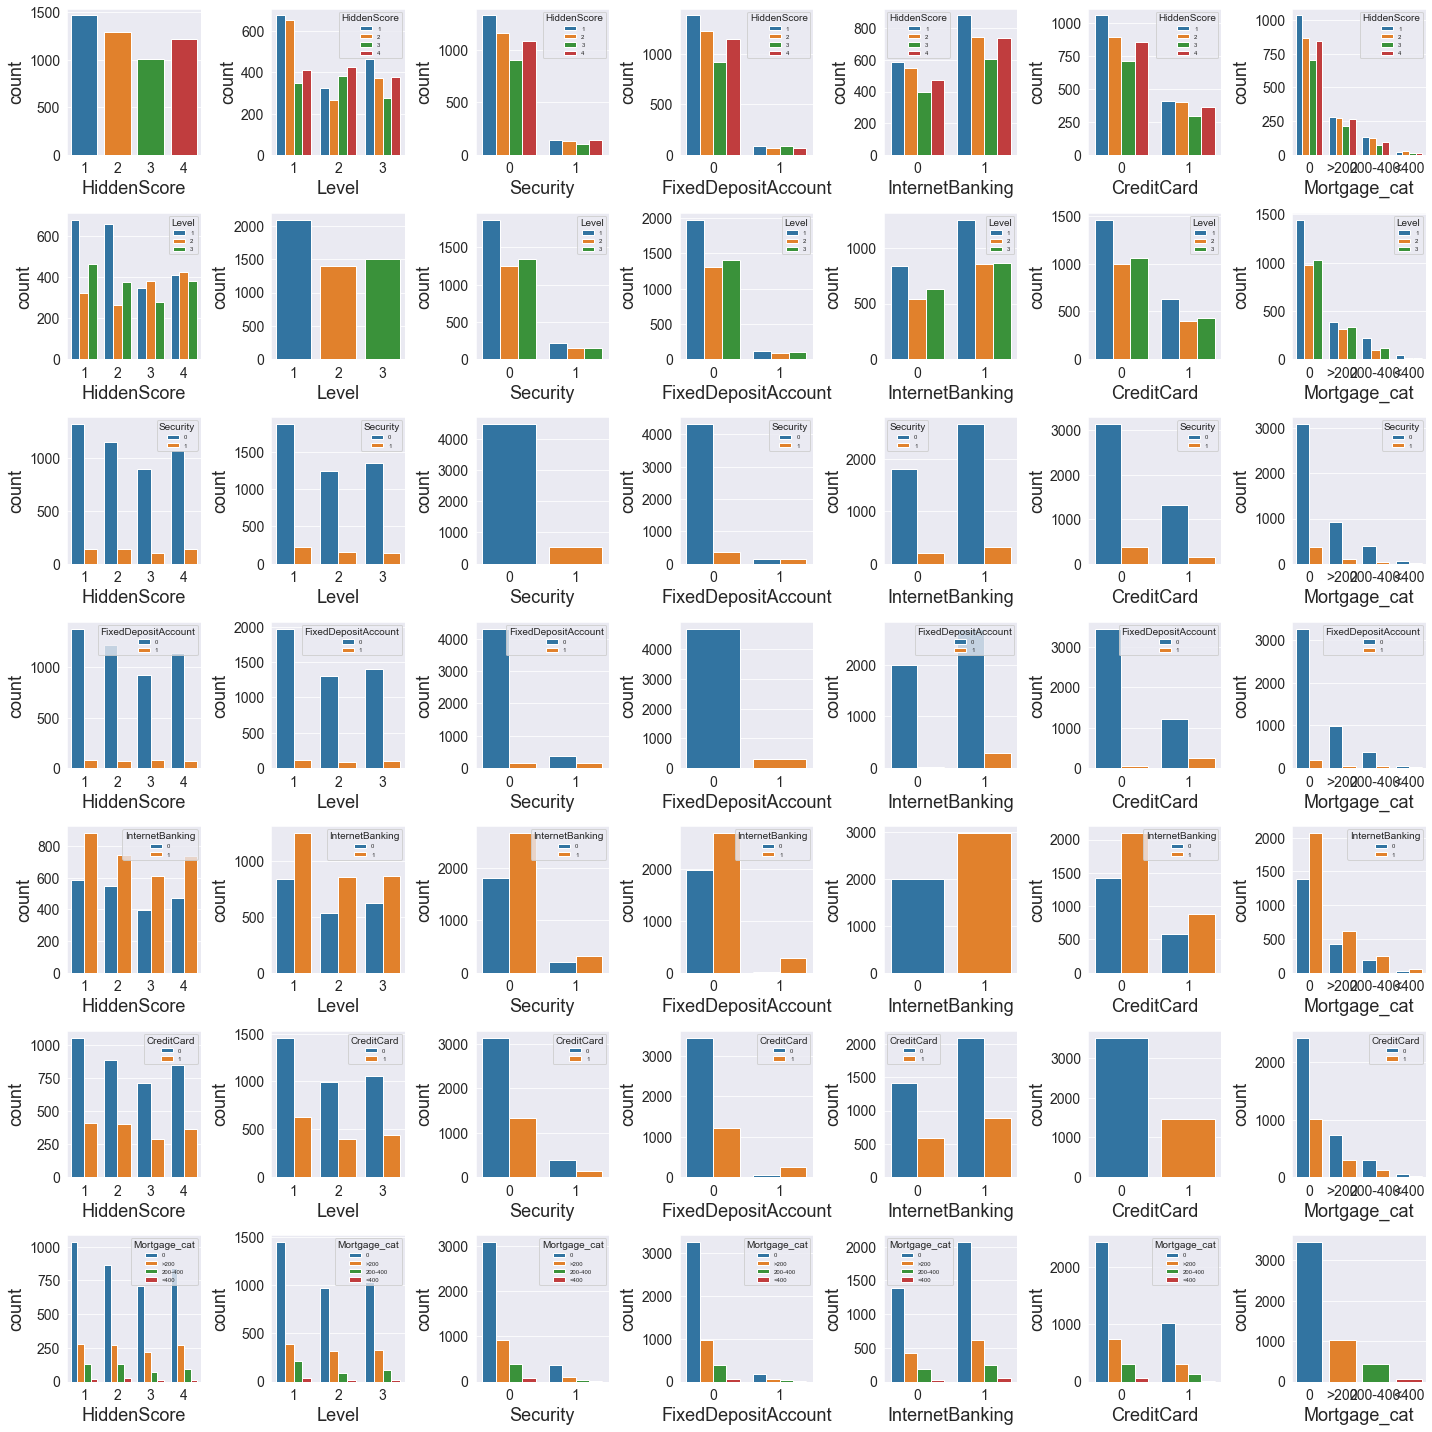

In [36]:
cols = [x for x in df.columns[-8:] if (x != 'LoanOnCard')]

fig,ax = plt.subplots(7,7,figsize=[20,20])
plt.rcParams['legend.fontsize'] = 6. # Resizing the legend parameter for this column


for i,ucol in enumerate(cols):
    for j,lcol in enumerate(cols):
        if i != j:
            sns.countplot(data=df,x=lcol,hue=ucol,ax=ax[i][j])
            
        else:
            sns.countplot(data=df,x=lcol,ax=ax[i][j])
plt.tight_layout()
plt.show()        

In most of the combinations, there doesn't appear to be any trend but in 7 of them, the trend is clearly visible and I have discussed them individually below

In [37]:
# Let's reset our legend parameter
plt.rcParams['legend.fontsize'] = 12.


Out of these 49 combinations, I have found some kind of patterns in 7 combinations. Let's explore them individually.

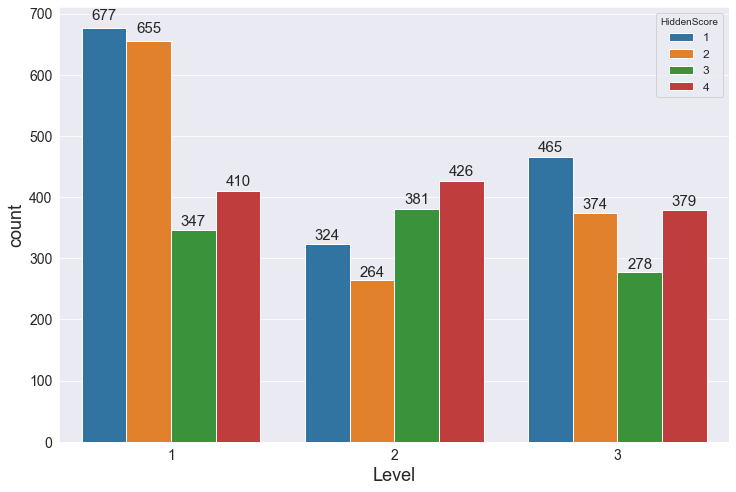

In [38]:
fig,ax = plt.subplots()
bar = sns.countplot(data=df,x='Level',hue='HiddenScore',ax=ax)
for j in bar.patches: 
    height = j.get_height()
    ax.text(j.get_x()+j.get_width()/2,height*1.02,height,ha="center",fontsize=15)

Here, we can see that in Level-2, the customers who have HiddenScore 3 and 4 have higher number than people who have HiddenScore of 1 and 2, which is not the case in Level-1 and Level-3.

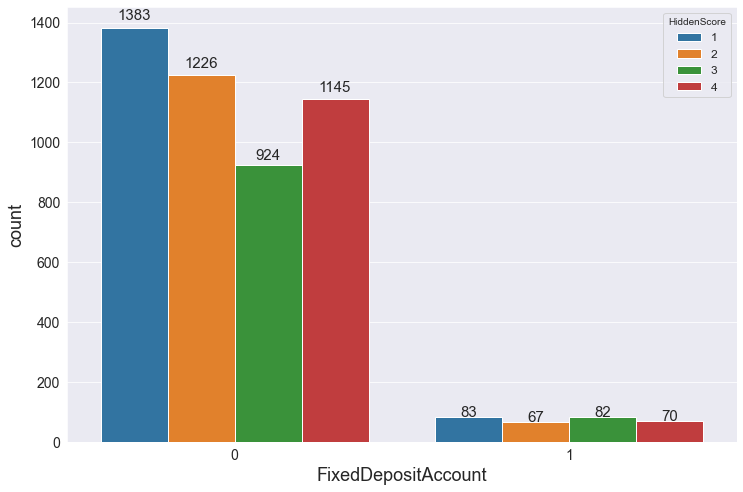

In [39]:
fig,ax = plt.subplots()
bar = sns.countplot(data=df,x='FixedDepositAccount',hue='HiddenScore',ax=ax)
for j in bar.patches: 
    height = j.get_height()
    ax.text(j.get_x()+j.get_width()/2,height*1.02,height,ha="center",fontsize=15)

Here, we can see that people with HiddenScore 3 has higher proportion of Fixed Deposit Accounts than any other.

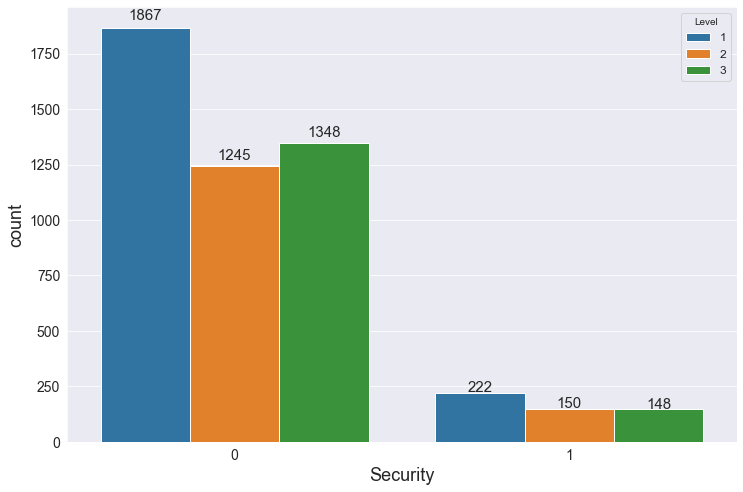

In [40]:
fig,ax = plt.subplots()
bar = sns.countplot(data=df,x='Security',hue='Level',ax=ax)
for j in bar.patches: 
    height = j.get_height()
    ax.text(j.get_x()+j.get_width()/2,height*1.02,height,ha="center",fontsize=15)

Here, we can see that Level-2 people have highest proportion of Security Deposit Lockers than any other.

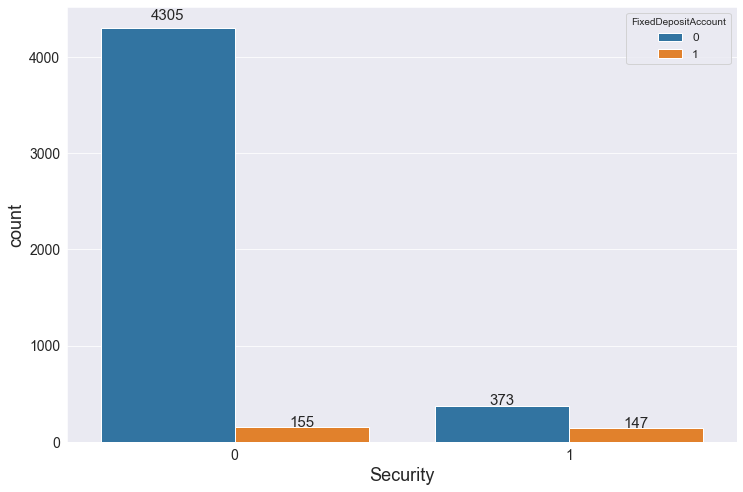

In [41]:
fig,ax = plt.subplots()
bar = sns.countplot(data=df,x='Security',hue='FixedDepositAccount',ax=ax)
for j in bar.patches: 
    height = j.get_height()
    ax.text(j.get_x()+j.get_width()/2,height*1.02,height,ha="center",fontsize=15)

Here, we can see that FixedDepositAccount and Security Deposit columns have a very high relation, where more than 50% of the people having the Fixed Account also have Security Deposit accounts as well

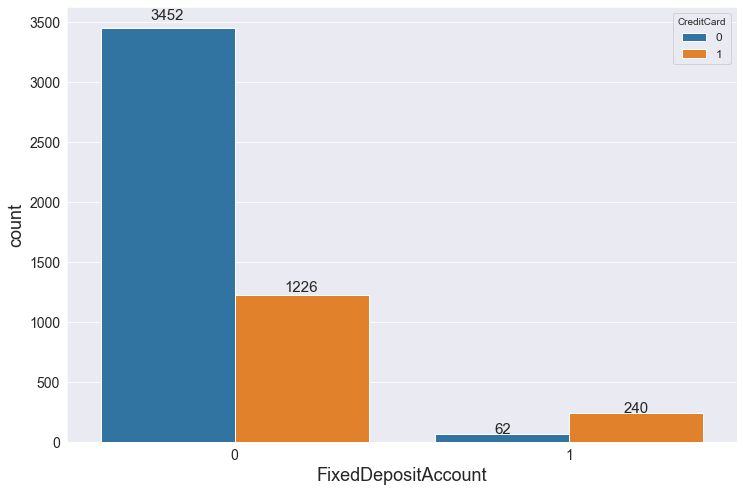

In [42]:
fig,ax = plt.subplots()
bar = sns.countplot(data=df,x='FixedDepositAccount',hue='CreditCard',ax=ax)
for j in bar.patches: 
    height = j.get_height()
    ax.text(j.get_x()+j.get_width()/2,height*1.02,height,ha="center",fontsize=15)

Here, we can see that FixedDepositAccount and CreditCard have a very high correlation, where less than 17% people who have FixedDepositAccount don't have a CreditCard. 

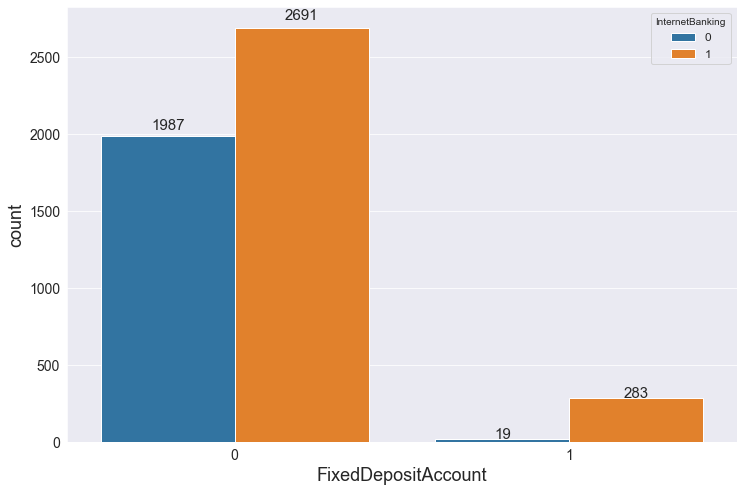

In [43]:
fig,ax = plt.subplots()
bar = sns.countplot(data=df,x='FixedDepositAccount',hue='InternetBanking',ax=ax)
for j in bar.patches: 
    height = j.get_height()
    ax.text(j.get_x()+j.get_width()/2,height*1.02,height,ha="center",fontsize=15)

Here as well, we can see that FixedDepositAccount have a very high correlation with InternetBanking, i.e., only 19 customers out of 302 people who have FixedDepositAccount don't have InternetBanking. 

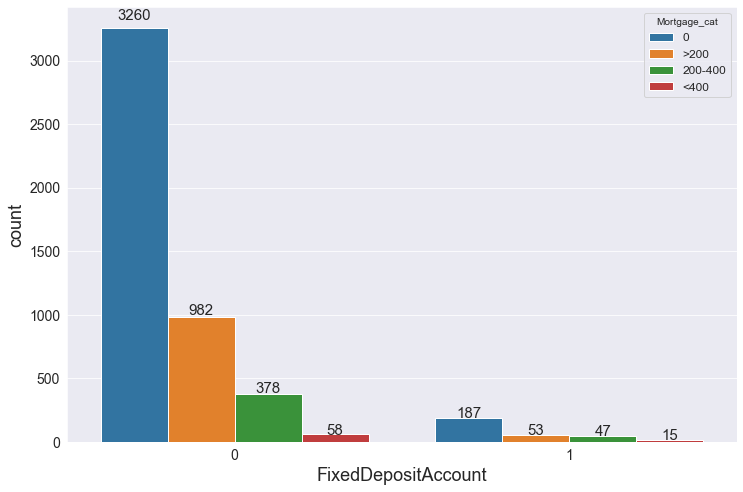

In [44]:
fig,ax = plt.subplots()
bar = sns.countplot(data=df,x='FixedDepositAccount',hue='Mortgage_cat',ax=ax)
for j in bar.patches: 
    height = j.get_height()
    ax.text(j.get_x()+j.get_width()/2,height*1.02,height,ha="center",fontsize=15)

Here, we can see that more than 38% who have FixedDepositAccount also have mortgaged something. 

Now, Let's do the bivariate analysis of all the categorical variables w.r.t. the target variable, LoanOnCard, that we skipped in our previous exercise. 

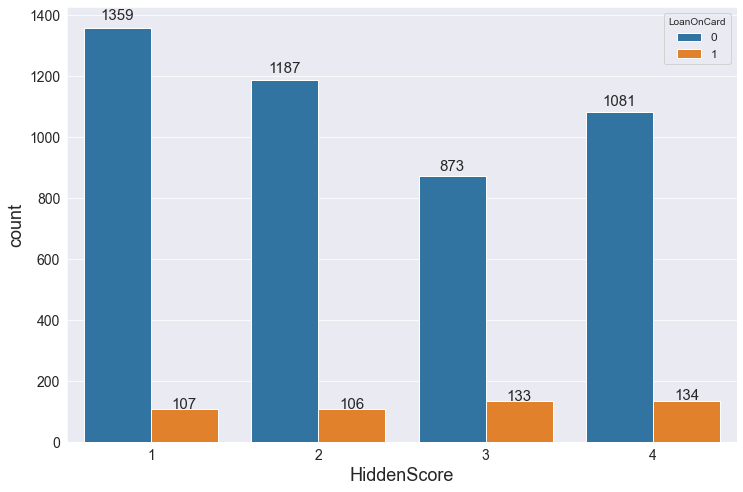

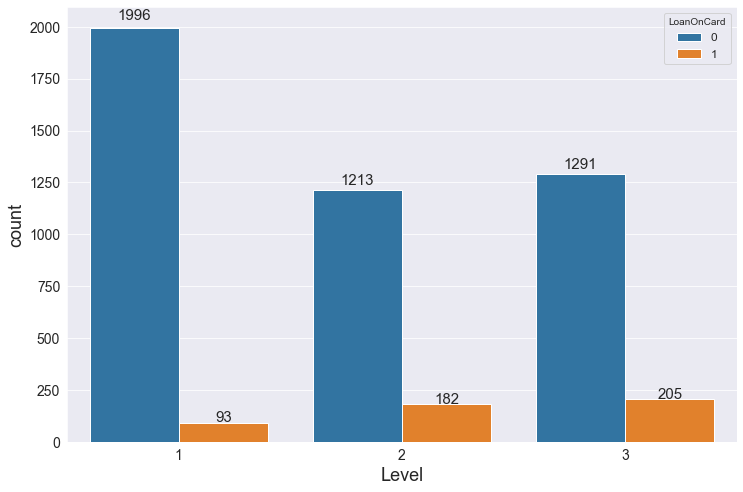

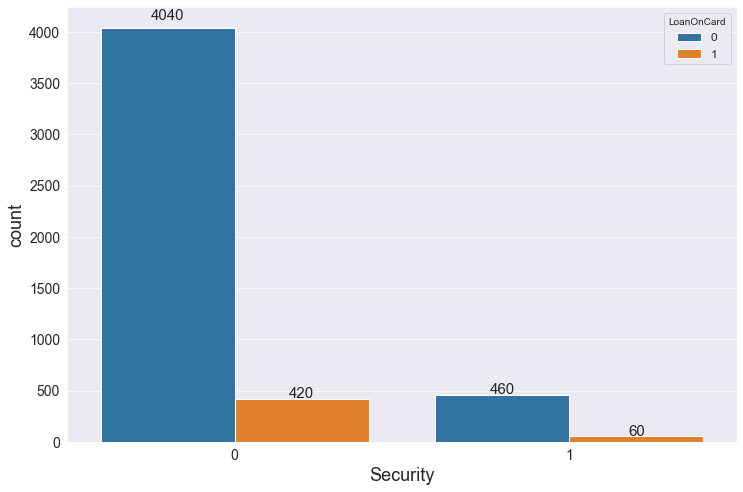

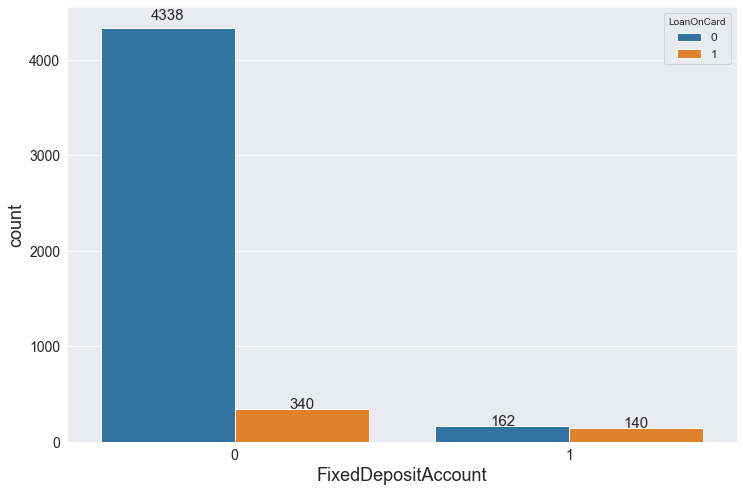

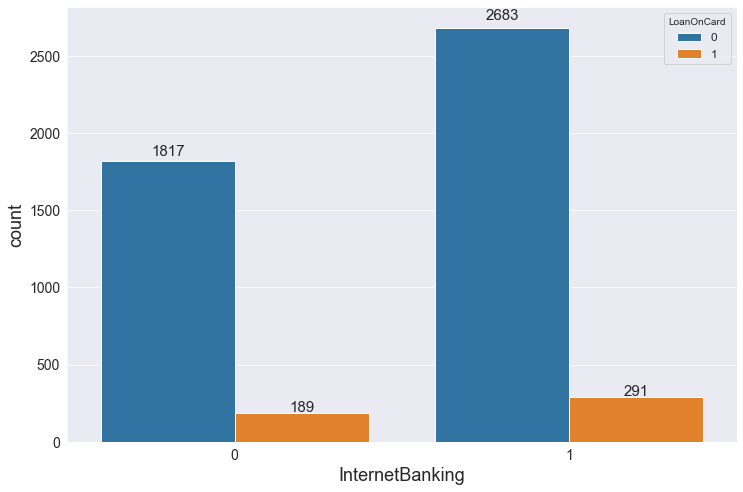

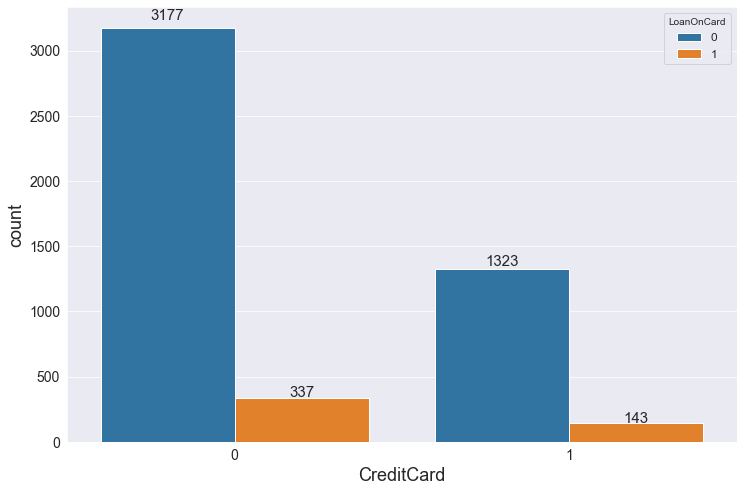

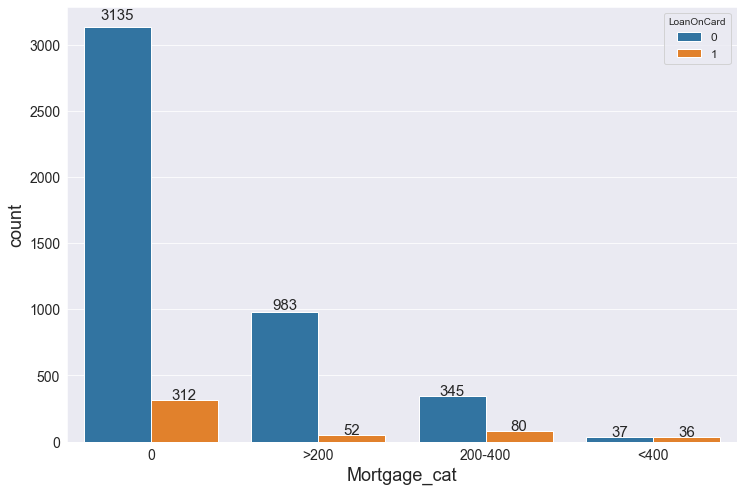

In [45]:
cols = [x for x in df.columns[-8:] if (x != 'LoanOnCard')]

for i in cols:
    fig,ax = plt.subplots()
    bar = sns.countplot(data=df,x=i,hue='LoanOnCard',ax=ax)
    for j in bar.patches: 
        height = j.get_height()
        ax.text(j.get_x()+j.get_width()/2,height*1.02,height,ha="center",fontsize=15)
    plt.show()

Analysis of all categorical variables with our target variable also throws interesting results:

* From <b>LoanOnCard with HiddenScore </b>, we can see that people having HiddenScore 3 has the higher proportion of loans than any other category and after that second highest proportion is of people having HiddenScore-4. 

* From <b>LoanOnCard with Level </b>, we can see that customers on Level-1 have much lesser Loans than the other two levels. 

* From <b>LoanOnCard with FixedDepositAccount </b>, we can see that almost 50% of the people who have FixedDepositAccount also have taken loan. 

* From <b>LoanOnCard with Mortgage_cat </b>, we can see that only 10% who have not mortgage anything have the loans, just 5% people low mortgages have the loan but these figures dramatically increase for mediumn and high mortgages where more than 20% people having medium mortgages have the loans and almost 50% people having high mortgages also have a loan. 

<b>Now, let's see the bivariate analysis of Categorical and Continuous variables:

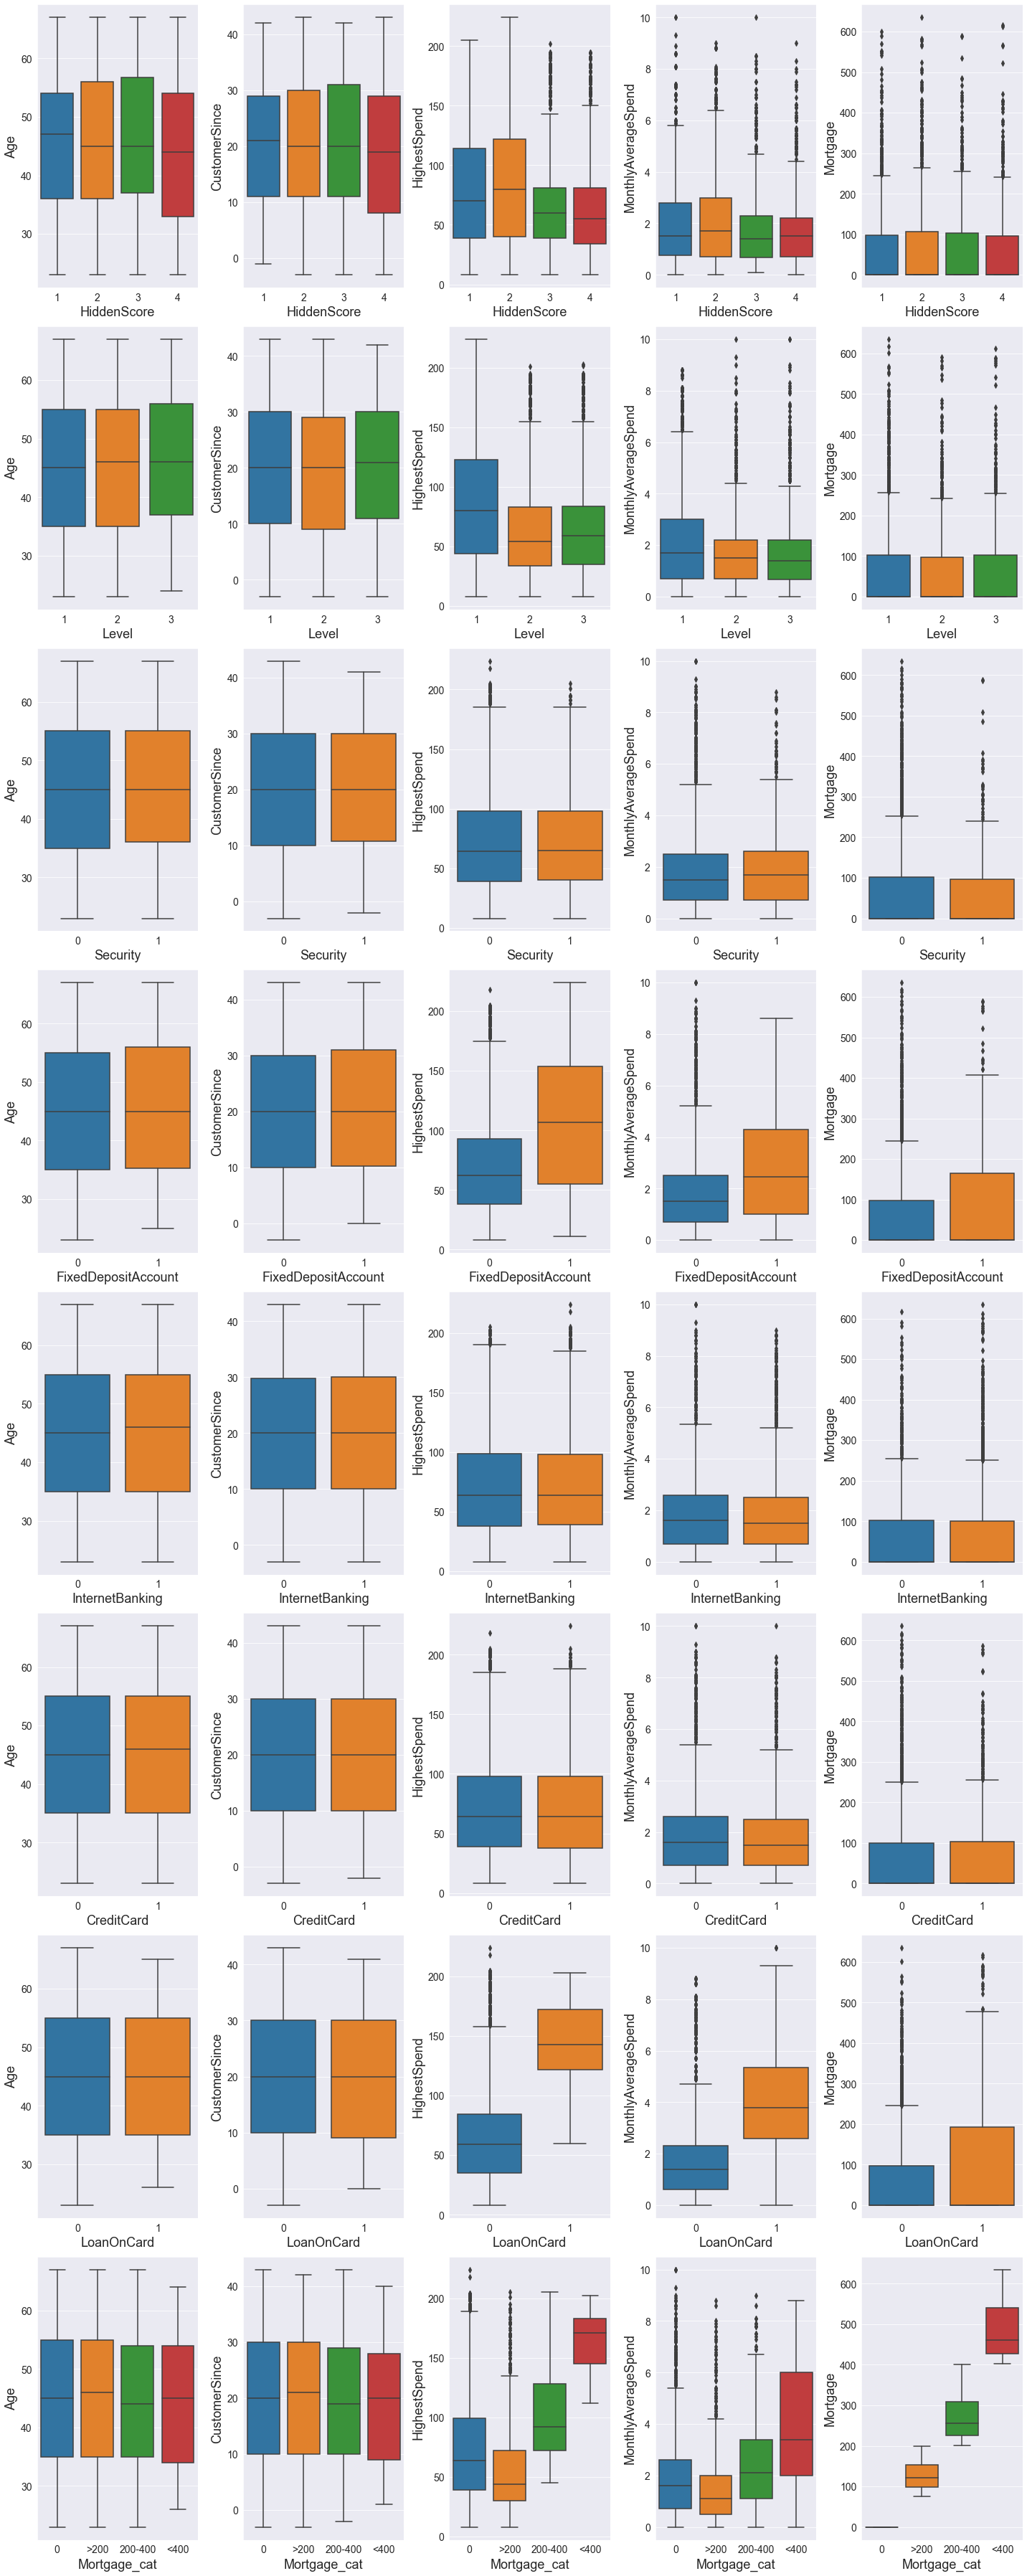

In [46]:
conti_cols = df.columns[2:7]
cat_cols = df.columns[7:]

fig,ax = plt.subplots(8,5,figsize=[20,50])

for i,ctcol in enumerate(cat_cols):
    for j, cncol in enumerate(conti_cols):
        sns.boxplot(data=df,x=ctcol,y=cncol,ax=ax[i][j])
        
plt.tight_layout()
plt.show()

Observations from the above plot:

* From <b>HiddenScore and Age </b>, we see that the median Age is decreasing as the HiddenScore is increasing. 

* From <b>HiddenScore and HighestSpend </b>, we see that customers with Score 2 spends the highest whereas, customers with score 4 spends the lowest. 

* From <b>Level and Age </b>, we see that median age is increasing as the Level is increasing. 

* From <b>Level and (HighestSpend and MonthlyAverageSpend) </b>, we see that Level 1 customers spends the highest.

* From <b>FixedDepositAccount and other continuous features </b>, we see that customers having fixed deposit accounts generally spend more and have higher Mortgages.

* From <b>LoanOnCard, which is our target variable with other continuous features</b>, we see that customers having loans tend to spend more and have higher mortgages. 

* From <b>Mortgage_cat with other continuous features </b>, we see that people having medium and high mortgages have moderate ages and tend to spend much higher than people who don't have any mortgage or have low mortgages.

Now is the time to quantify these observations by doing the appropriate statistical tests over our predictors w.r.t. to our target variable to see which feature is statistically significant in predicting our target variable and which isn't. 

But before that let's see which are the appropriate tests and set the rules for them.<br>

<b>For continuous variables w.r.t. our target variable, i.e., LoanOnCard, we will perform ANOVA test</b><br>
1. What is ANOVA test?<br>

ANOVA(Analysis Of Variance) test is a hypothesis testing technique which tests the equality of two or more population means by examining the variances of samples that are taken.

2. Define Null and Alternate Hypothesis:

* $H_0$: Means(i.e. $\mu$) of all the samples are same.
* $H_A$: At least one mean (i.e., $\mu$) differs

3. Let's decide our significance level:

### <center>$\alpha$ = 0.05</center>

4. Let's identify our test statistic:

ANOVA uses F-tests and F-statistic to statistically test the equality of means

5. Set the rules to accept or reject the Null Hypothetis:

* If p-value comes out to be greater than our significance level, i.e., 0.05, then we will fail to reject Null Hypothesis.
* If p-value comes out to be less than our significance level, we will reject our Null Hypothesis.

<b>For Categorical variables w.r.t. our target variable, i.e., LoanOnCard, we will perform Chi-Square Test for Independence:</b>

1. What is Chi-square test for Independence?

The Chi-Square Test of Independence determines whether there is an association between categorical variables (i.e., whether the variables are independent or related). It is a non-parametric test.

This test utilizes a contingency table to analyze the data. A contingency table is an arrangement in which data is classified according to two categorical variables. The categories for one variable appear in the rows, and the categories for the other variable appear in columns.


$\chi^2$ = $\sum_{i=1}^{n}\sum_{j=1}^{m}\frac{({O_{ij}-E_{ij}})^2}{E_{ij}}$

where

${O_{ij}}$ is the observed cell count in the ith row and jth column of the contingency table

${E_{ij}}$ is the expected cell count in the ith row and jth column of the contingency table

The corresponding degrees of freedom is (r - 1) * ( c  - 1) , where r is the number of rows and c is the number of columns in the contingency table.

2. Let's decide Null Hypothesis and Alternate Hypothesis:

* $H_0$: Proportions of observed and expected values are same.
* $H_A$: Proportions of observed and expected values are different.

3. Let's decide our significance level:

### <center>$\alpha$ = 0.05</center>

4. Let's identify our test statistic:

Chi-square test uses $\chi^2$ statistic to find out the independence of categorical variables.

5. Set the rules to accept or reject the Null Hypothetis:

* If p-value comes out to be greater than our significance level, i.e., 0.05, then we will fail to reject Null Hypothesis.
* If p-value comes out to be less than our significance level, we will reject our Null Hypothesis.

In [47]:
cols = [x for x in df.columns if x not in ['ID','ZipCode','LoanOnCard']]
start = "\033[1m"
end = '\033[0m'

for i in cols:
    if i in cols[:5]:    
        data = pd.concat([df[i],df['LoanOnCard']],axis=1).dropna().copy(deep=True)    
        mod = ols("%s ~ LoanOnCard" %i,data=data).fit()
        anova = sm.stats.anova_lm(mod,typ=2)
        print(start+"\t\t\t Statistical Analysis of %s \n" %i + end)
        print(anova)
        print('\n')
        print('.'*100)
        
    else:
        print(start+"\t\tContingency Table for Analysis of %s with LoanOnCard is:" %i+end)
        print(pd.crosstab(df[i],df['LoanOnCard'],margins=True))
        print('\n')
        print('.'*100)
        obs = np.array(pd.crosstab(df[i],df['LoanOnCard']))
        chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(obs)
        print(start+"\t\t\t Statistical Analysis of %s \n" %i + end)
        print("P-Value of the test is:",p_value)
        print('\n')
        print('_'*100)
    
        
    

			 Statistical Analysis of Age 

                   sum_sq      df         F    PR(>F)
LoanOnCard      43.432953     1.0  0.330425  0.565435
Residual    654337.383111  4978.0       NaN       NaN


....................................................................................................
			 Statistical Analysis of CustomerSince 

                   sum_sq      df         F    PR(>F)
LoanOnCard      39.857285     1.0  0.302982  0.582043
Residual    654855.187694  4978.0       NaN       NaN


....................................................................................................
			 Statistical Analysis of HighestSpend 

                  sum_sq      df           F         PR(>F)
LoanOnCard  2.669746e+06     1.0  1682.71501  3.785424e-317
Residual    7.897948e+06  4978.0         NaN            NaN


....................................................................................................
			 Statistical Analysis of MonthlyAverageSpend 

                

<b>Conclusions from the Statistical Analysis of the variables:</b>

<b>For Continuous Variables-</b> As per our set rules:<br>

* Variables in which we have <b>Failed to reject the Null Hypothesis</b> are <b>Age and CoustomerSince</b>

* Variables in which we <b>reject the Null Hypothesis</b> are <b>MonthlyAverageSpend, HighestSpend and Mortgage(Continuous one)</b>.

<b>For Categorical Variables-</b> As per our set rules:<br>

* Variables in which we have <b>failed to reject the Null Hypothesis</b> are <b>Security, InternetBanking and CreditCard</b>.

* Variables in which we <b>reject the Null Hypothesis</b> are <b>HiddenScore, Level, FixedDepositAccount and Mortgage_cat(categorical one)</b>

Note: It is interesting to see both the columns of Mortgage (continuous and categorical) are statisitically significant. That means by bucketing the values of continuous variable of Mortgage into a categorical one, we have not lost any information. Hence, our bucketing exercise was right. Now, we can ignore the continuous column of Mortgage in our model building since we have captured all its information in a categorical one.

<b>Now, let's do multi-variate analysis:</b>

Let's start with continuous variables and our target variable.<br>
(For the purpose of making our target variable as a categorical variable, which is right now encoded with binary values, we will make another column named: <b>Loan_cat</b>, but we will remove it after doing our analysis.)

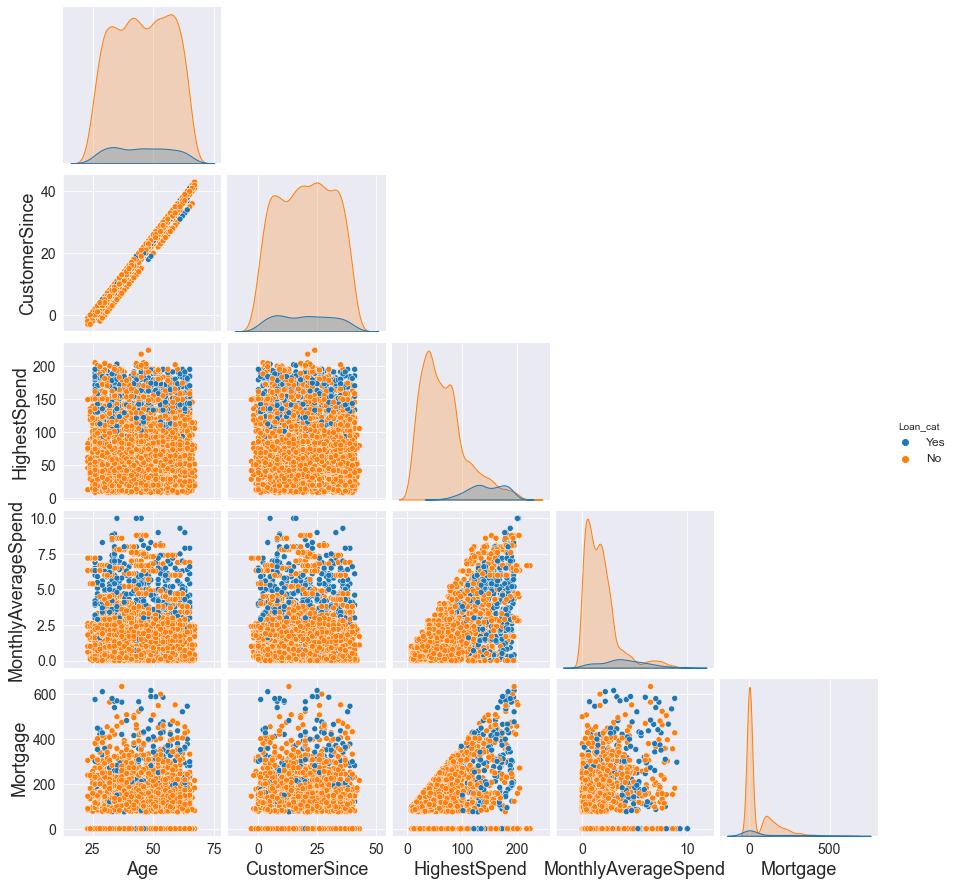

In [48]:
df['Loan_cat'] = ['No' if x == 0 else 'Yes' for x in df['LoanOnCard']]
cols = ['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage']
sns.pairplot(data=df,vars=cols,hue='Loan_cat',corner=True)

Despite heavy overlap of the binary classes of our target variable in the above scatterplots between continuous variables, we can see that classes are still separable in each of them. This is a good sign and would help in getting a decent accuracy of our models, i.e., giving decent predictions.

In [49]:
df = df.drop('Loan_cat',axis=1) # Dropping that newly formed column, as said before.

<b>Now, let's do multivariate analysis of our Categorical Variables and our target variable:</b>

Note: 
* Even though multivariate visualization of categorical variables will not be that informative since extracting information out of it would be very difficult, but for the demonstration purpose, I will perform this exercise. 

* Secondly, just to make this exercise precise, let's do this exercise only on the categorical variables which have been found statistically significant in our statistical analysis.

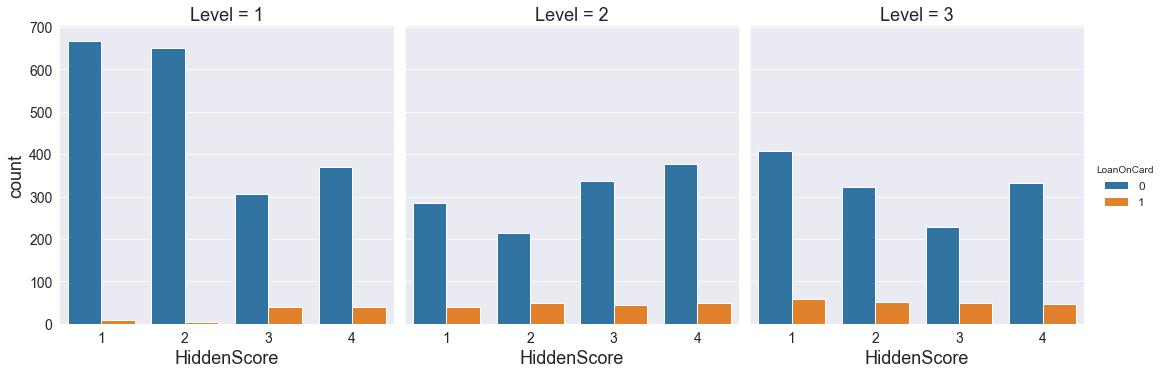

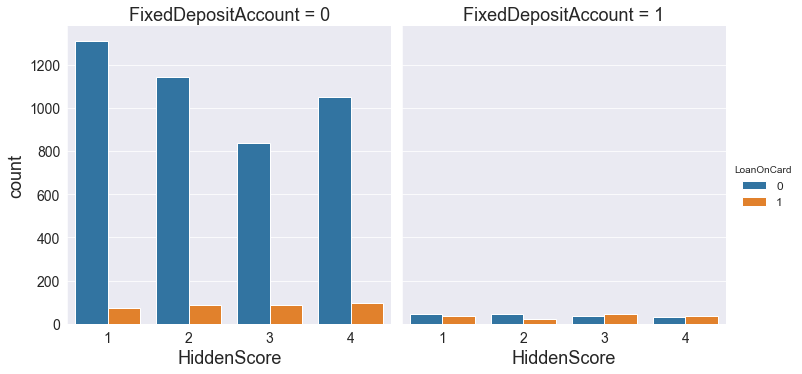

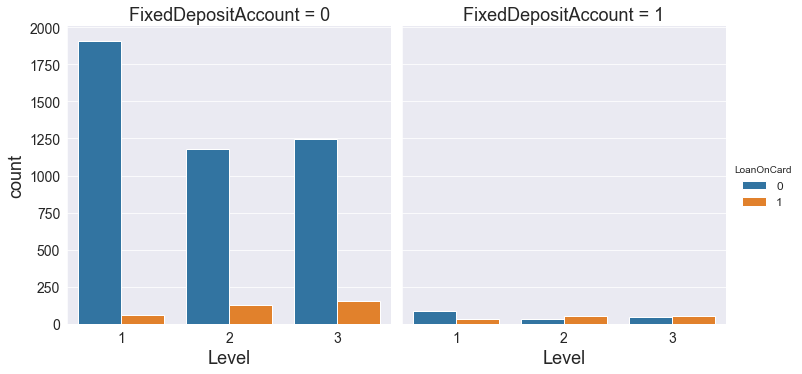

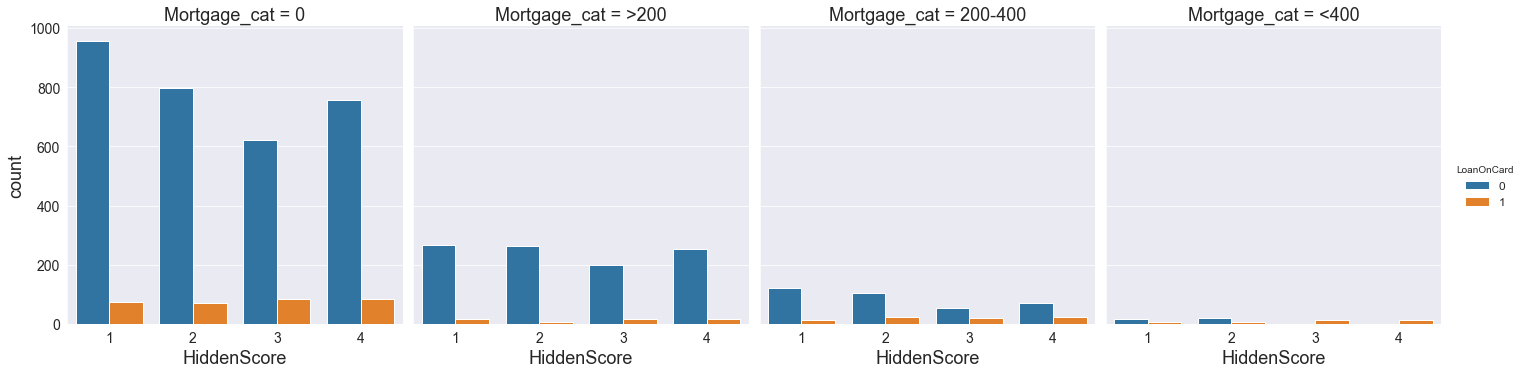

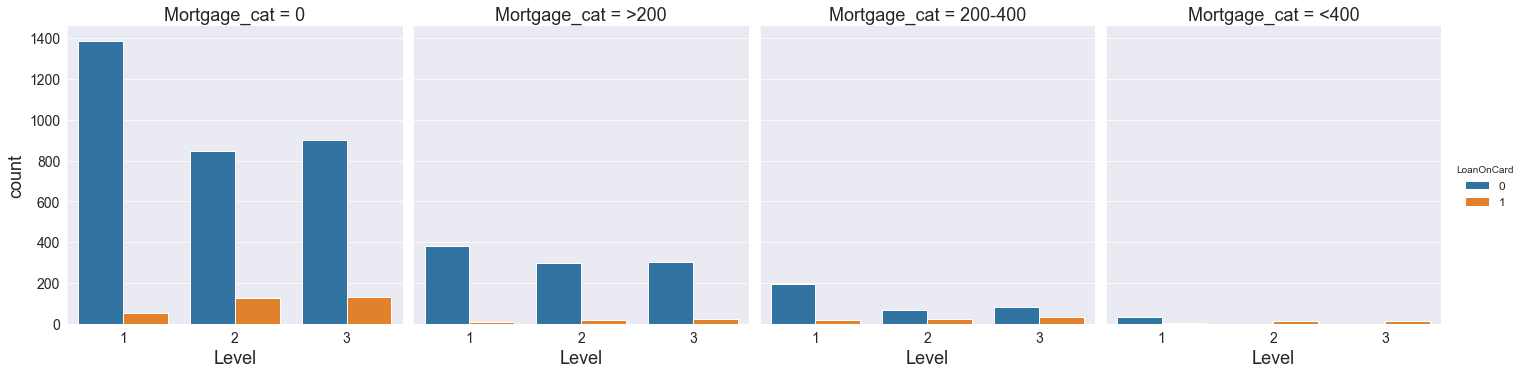

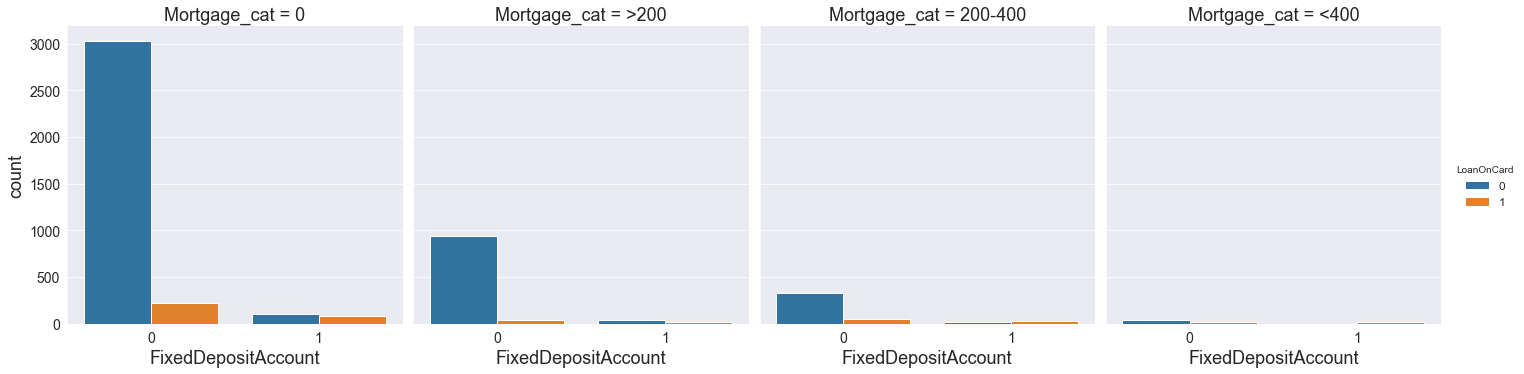

In [50]:
cols = ['HiddenScore','Level','FixedDepositAccount','Mortgage_cat']

for i,ucol in enumerate(cols):
    for j,lcol in enumerate(cols):
        if (i>j):
            sns.catplot(data=df,x=lcol,col=ucol,hue='LoanOnCard',kind='count')
            plt.show()

As we can see that not much is there that we can extract since an overwhelming amount of information is generating which is not easy to interpret and conclude anything. <br>

Still, let me try to interpret the information as much as possible.

* Customers having HiddenScore of 3 & 4 in Level-1 have higher proportion of taking loans than the customers with HiddenScore of 1 & 2.

* Similarly, customers in Level 3 have taken more loan for all HiddenScore than in Level 2 or 1. 

* Customers having FixedDepositAccount and having HiddenScore of 3 & 4 have higher proportion of taking loans than others.

* Similarly, Customers having FixedDepositAccount and having Level 2 & 3 have taken more loans than others.

* Almost all the customers having HiddenScore of 3 & 4 and Mortgage of >400 category have taken loans.

* Similarly, almost all the customers having Level of 2 & 3 and Mortgage of >400 category have taken loans.

* Customers having the FixedDepositAccount and having the Mortgage of more than 200 (masked value) have higher proportion of taking loans than others.

In [51]:
df['Mortgage_cat'].value_counts()

0          3447
>200       1035
200-400     425
<400         73
Name: Mortgage_cat, dtype: int64

Before going to our model building, let's first label encode our newly formed feature Mortgage_cat so that it doesn't create any problem later.

In [52]:
lab_encode = {"0":0,">200":1,"200-400":2,"<400":3}

df['Mortgage_cat'] = df['Mortgage_cat'].replace(lab_encode)

<a id='4'></a>
## 4. Data pre-processing:

Let's segregate our columns.<br>

But before that let us discuss which columns are to be left out from our predictor variables.

1. Since Age and CustomerSince columns have the perfect collinearity, it would be wise to drop one of them. But which one to drop? In my opinion, we should drop Age column since we know that younger people are joining the bank more than the older ones. So, if the bank focusses on the ones who are joining the bank recently, it will cover the Age column as well.

2. Mortgage- Continuous variable is being dropped since I have captured all its information into the categorical one named: Mortgage_cat

3. ID and ZipCode columns are not worth adding into our predictor variables since they are not going to give any relevant information.

In [64]:
X = df.drop(['Age','Mortgage','ID','ZipCode','LoanOnCard'],axis=1)
y = df['LoanOnCard']

Now that we have split the data into dependent and independent variables, i.e., X and y, let's do scaling of the continuous variables since we are going to use Logistic Regression Algorithm and for all the algorithms which are based on Gradient Descent, like Linear Regression and Logistic Regression, scaling is the best practice since it helps find the global minima of the loss function smoothly. 

In [53]:
# Let's create an instance of MinMaxScaler

mms = MinMaxScaler()

We will scale the data after spliting the data into train and test set. We will only fit the training data in this scaler so that no data is leaked into testing data.

## Is our target variable imbalanced?

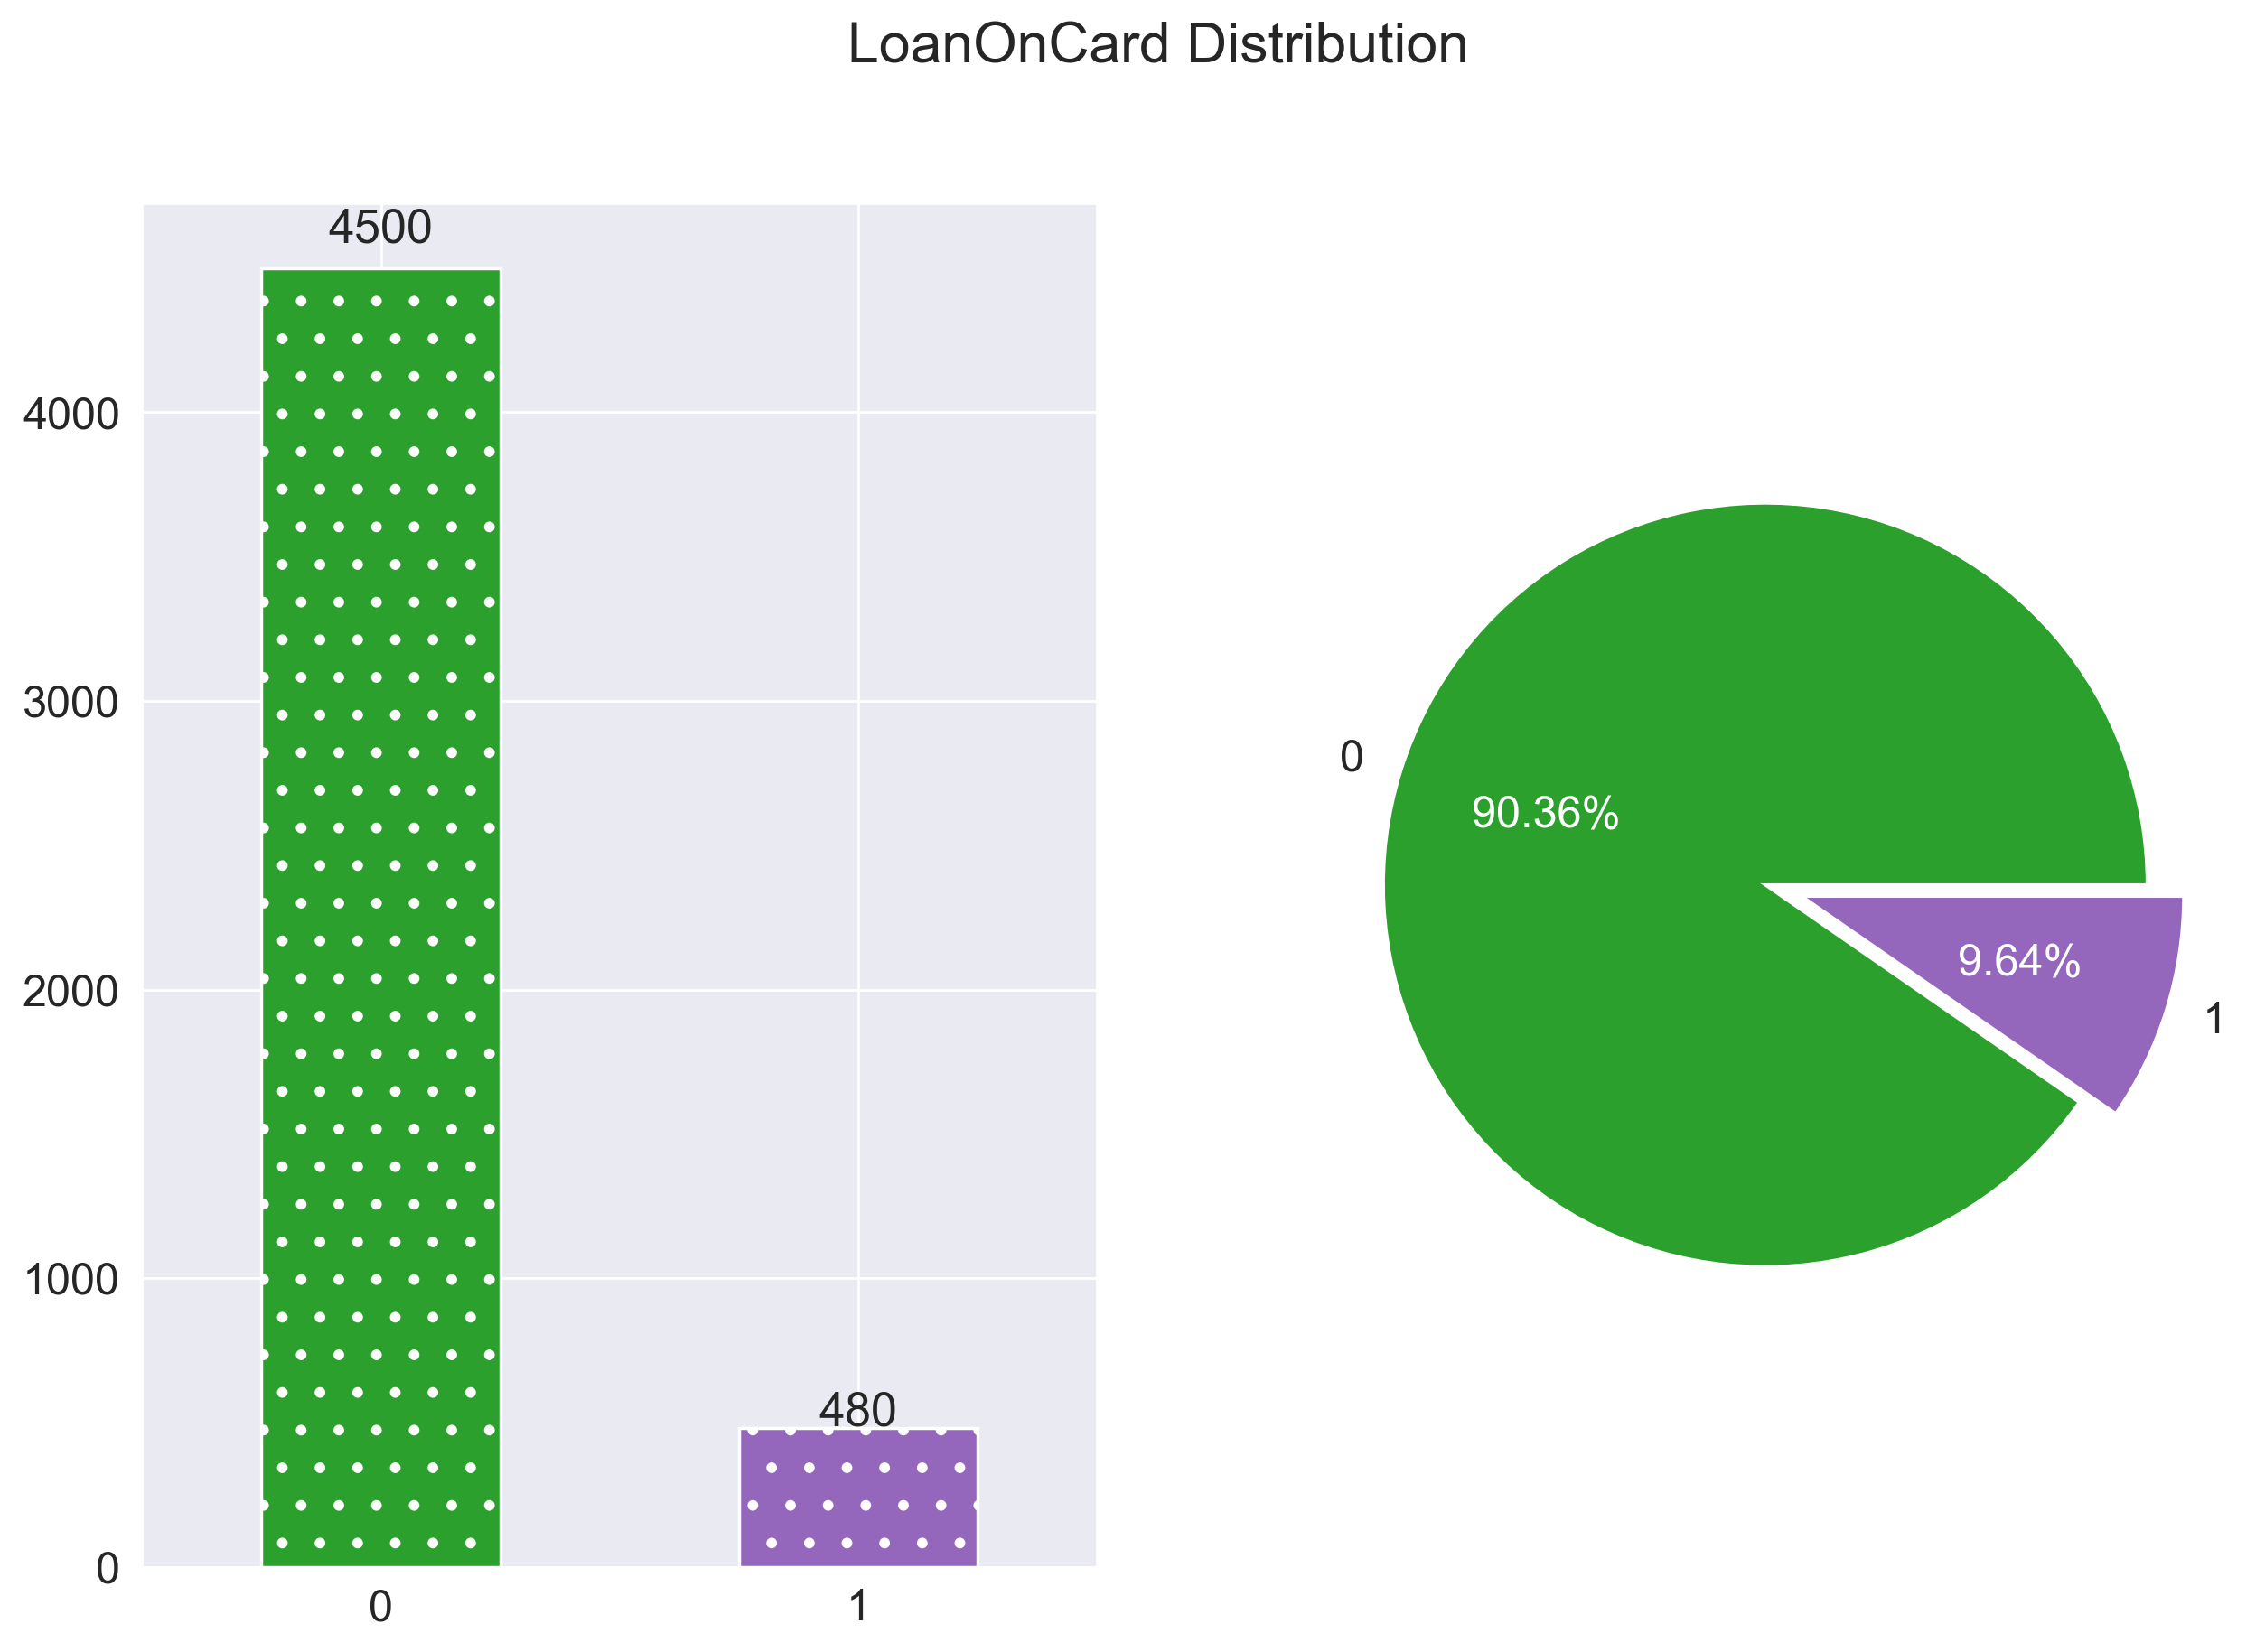

In [56]:
fig , ax = plt.subplots(1,2,dpi=250)

fig.suptitle('LoanOnCard Distribution',fontsize=18.)

bar = df['LoanOnCard'].value_counts().plot.bar(ax=ax[0],
rot=0,color=[sns.color_palette()[2],sns.color_palette()[4]],hatch='.')
for i in bar.patches: 
    height = i.get_height()
    ax[0].text(i.get_x()+i.get_width()/2,height*1.02,height,ha="center",fontsize=15)

p = df['LoanOnCard'].value_counts().plot.pie(ax=ax[1],autopct="%.2f%%",fontsize=14.,
colors=[sns.color_palette()[2],sns.color_palette()[4]],explode=(0,0.1)),
ax[1].texts[1].set_color('white'),ax[1].texts[3].set_color('white')
ax[1].set_ylabel("")
plt.show()

As we can see that our target variable is highly imbalanced, where one class has more than 90% values whereas the other one has less than 10%. 

This is surely going to create problems in our model building, where the majority class is going to dominate over all our predictions.

<b>So, for the model building purpose, I am going to use four methods:

1. I am going to use the stratified method, where while spliting the data-set into train and test data, I will keep the proportion of both the classes same as in the original data-set.

2. I am going to use an over-sampling method, called SMOTE, where I am going to generate synthetic observations of the minority class to close the gap of imbalance. 

3. I am going to use an under-sampling method, called TomekLinks, where I am going to reduce the samples of the majority class to balance our classes.

4. I am going to use a combined method of over-sampling and under-sampling, called SMOTETomek, where first it will over-sample the minority class and then going to under-sample the entire data.</b>

I will evaluate the performance of both Logistic Regression model and Naive Bayes model on all these methods and see how well our models perform in all these methods. Then I will choose the method which is performing well and do futher analysis.

In [65]:
# Spliting the data using 1st method: Stratified spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=108,stratify=y)

In [58]:
# Let's scale our continuous train featues now, which we have just 3 now. 

X_train.iloc[:,:3] = mms.fit_transform(X_train.iloc[:,:3])

In [59]:
# Let's scale the test data as well

X_test.iloc[:,:3] = mms.transform(X_test.iloc[:,:3])

In [60]:
# Let's define the instance of over-sampling method called SMOTE

smote = SMOTE(random_state=108)

In [61]:
# Let's define the instance of under-sampling method called TomekLinks

tl = TomekLinks()

In [62]:
# Let's define the instance of combination of both, called SMOTETomek

st = SMOTETomek()

We are only going to generate synthetic data for our training purpose to train the model. Once, it is trained, we want to test it on the real data, not on the synthetic data. Hence, we are only going to generate synthetic samples in our training data, not in our test data. 

In [63]:
#Let's generate synthetic data for over-sampling method

X_smote , y_smote = smote.fit_sample(X_train,y_train)

In [64]:
y_smote.value_counts() # This has balanced the training data by over-sampling minority class

1    3600
0    3600
Name: LoanOnCard, dtype: int64

In [65]:
#Let's generate synthetic data for under-sampling method

X_tl , y_tl = tl.fit_sample(X_train,y_train)

In [66]:
y_tl.value_counts() # This has slightly under-sampled the majority class

0    3566
1     384
Name: LoanOnCard, dtype: int64

In [67]:
#Let's generate synthetic data for combination of both

X_st , y_st = st.fit_sample(X_train,y_train)

In [68]:
y_st.value_counts() # This has balanced and under-sampled both the classes

1    3596
0    3596
Name: LoanOnCard, dtype: int64

<a id='5'></a>
## 5. Model training, testing and tuning:

Since we have to evaluate two models on many types of data, let's create a function to evaluate the models which would make things easier for us:

In [66]:
def evaluate_model(X_train, y_train, model, X_test = X_test, y_test = y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
    diff = scores.mean() - model.score(X_test, y_test)
    start = "\033[1m"
    end = '\033[0m'
    
    print(start+"Training Score:"+end,model.score(X_train, y_train))
    print(start+"Cross V Score: "+end,scores.mean()," +/-" ,scores.std())
    print(start+"Testing Score:"+end, model.score(X_test, y_test))
    print(start+"Cross & Test Diff:"+end,diff)
    print(start+"\n \t\t\t\tConfusion Matrix "+end)
    print("\t\t\t\t-----------------")
    cm = confusion_matrix(y_test,preds)
    cm_df = pd.DataFrame(cm,index=model.classes_,columns=["Pred_%s" %i for i in model.classes_])
    p = sns.heatmap(cm_df,annot=True,cmap='RdBu_r',annot_kws={'size':15})
    _ = p.set(xlabel='Predicted Labels',ylabel='True Labels',xticklabels=['No','Yes'],
              yticklabels=['No','Yes'])
    plt.show()
    print("\n")
    print(start+"\t\t\tClassification Report\n"+end,classification_report(y_test, preds))

In [54]:
# Let's create an instance of Logistic regression

log_model = LogisticRegression(max_iter=100000)

In [55]:
# Let's create an instance of Naive Bayes

nb_model = GaussianNB()

<b>Let's first evaluate both of our models for simple stratified splitting:

Training Score: 0.9503012048192772
Cross V Score:  0.9480421686746987  +/- 0.002679989521092178
Testing Score: 0.9487951807228916
Cross & Test Diff: -0.0007530120481928915

 				Confusion Matrix 
				-----------------


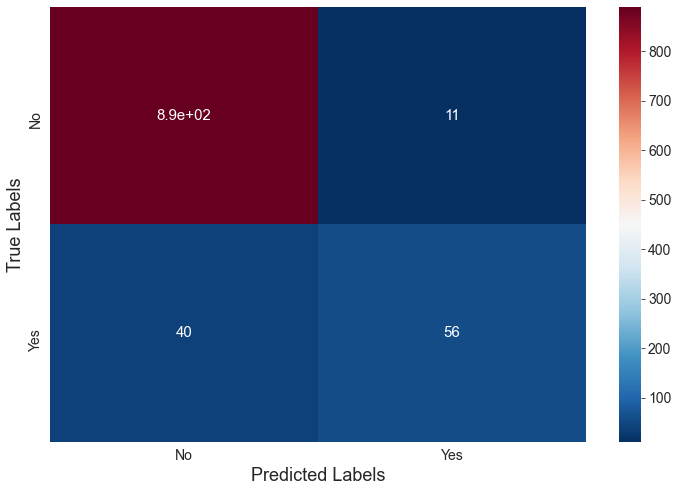



			Classification Report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       900
           1       0.84      0.58      0.69        96

    accuracy                           0.95       996
   macro avg       0.90      0.79      0.83       996
weighted avg       0.95      0.95      0.94       996



In [72]:
# Let's evaluate with Logistic Regression Model:

evaluate_model(X_train,y_train,log_model)

Training Score: 0.8903112449799196
Cross V Score:  0.8908132530120482  +/- 0.007090585789069045
Testing Score: 0.8704819277108434
Cross & Test Diff: 0.02033132530120474

 				Confusion Matrix 
				-----------------


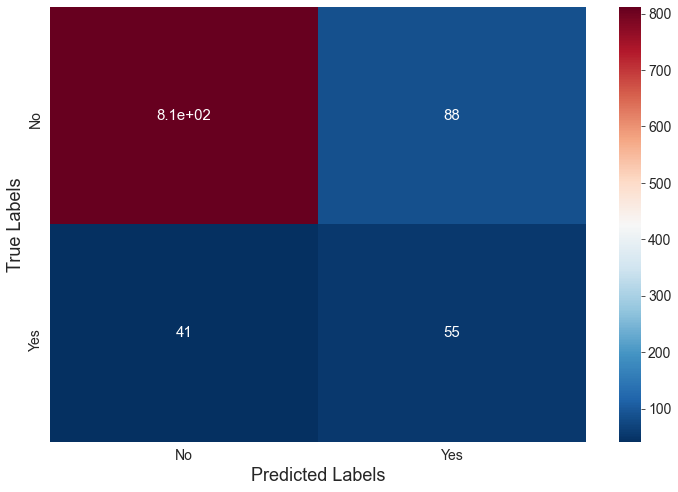



			Classification Report
               precision    recall  f1-score   support

           0       0.95      0.90      0.93       900
           1       0.38      0.57      0.46        96

    accuracy                           0.87       996
   macro avg       0.67      0.74      0.69       996
weighted avg       0.90      0.87      0.88       996



In [73]:
# Let's evaluate with GaussianNB Model:

evaluate_model(X_train,y_train,nb_model)

<b> Evaluation of the performance of both the models with method-1-> Stratified Spliting:</b><br>

Logistic Regression model is performing much better than Naive Bayes Model, where we can see the difference in the most basic metric, Accuracy, which is almost 8% higher for Logistic Regression model than Naive Bayes model. 

Then we can see the apparent difference in the classification report of both the models where Logistic Regression has outscored Naive Bayes in all the metrics like Precision, Recall and overall F1-score. We see that F1-score for Logistic Regression is 4% higher for majority class and a whopping 23% for the minority class.

<b>Now, let's first evaluate both of our models for over-sampled training data:

Training Score: 0.9094444444444445
Cross V Score:  0.9095833333333333  +/- 0.0011785113019776065
Testing Score: 0.8835341365461847
Cross & Test Diff: 0.026049196787148565

 				Confusion Matrix 
				-----------------


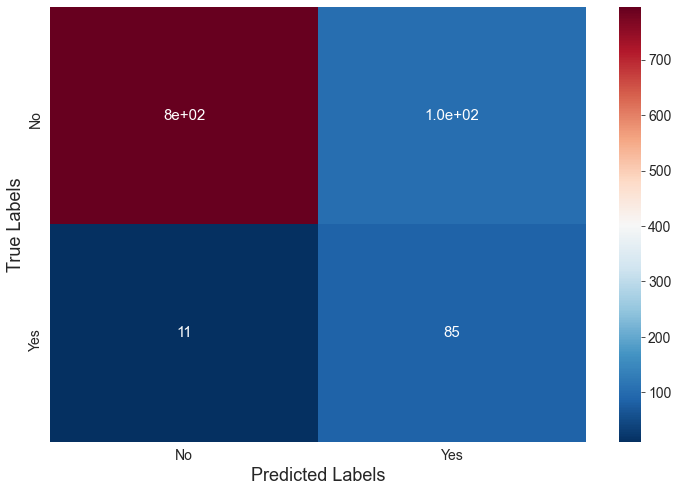



			Classification Report
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       900
           1       0.45      0.89      0.59        96

    accuracy                           0.88       996
   macro avg       0.72      0.88      0.76       996
weighted avg       0.93      0.88      0.90       996



In [74]:
# Let's evaluate with Logistic Regression Model:

evaluate_model(X_smote,y_smote,log_model)

Training Score: 0.8670833333333333
Cross V Score:  0.8672222222222222  +/- 0.0034916125249934626
Testing Score: 0.8634538152610441
Cross & Test Diff: 0.0037684069611780835

 				Confusion Matrix 
				-----------------


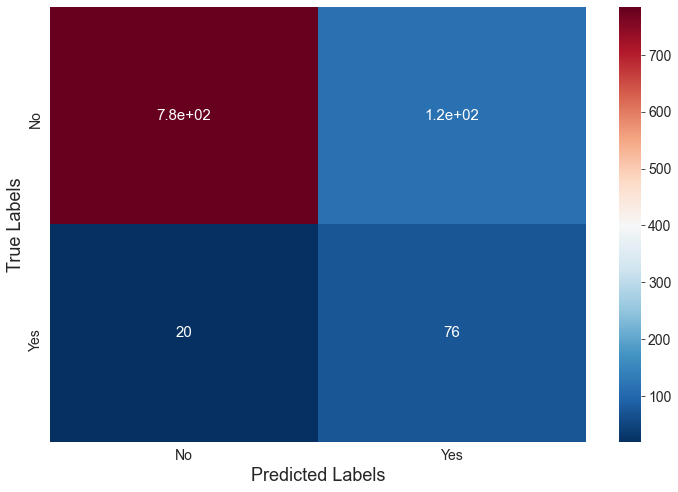



			Classification Report
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       900
           1       0.40      0.79      0.53        96

    accuracy                           0.86       996
   macro avg       0.69      0.83      0.72       996
weighted avg       0.92      0.86      0.88       996



In [75]:
# Let's create an instance of Naive Bayes

evaluate_model(X_smote,y_smote,nb_model)

<b> Evaluation of the performance of both the models with method-2-> Over-sampling method, SMOTE:</b><br>

Logistic Regression model is performing much better than Naive Bayes Model, where we can see the difference in the most basic metric, Accuracy, which is almost 3% higher for Logistic Regression model than Naive Bayes model. 

Then we can see the apparent difference in the classification report of both the models where Logistic Regression has outscored Naive Bayes in all the metrics like Precision, Recall and overall F1-score. We see that F1-score for Logistic Regression is 2% higher for majority class and 7% for the minority class.

<b>Note</b>: One more interesting observation that I noted here is that after over-sampling the data-set, the Recall of the minority class improved considerably compared to the simple stratified spliting model. Whereas, the precision of the minority class and the Recall of the majority class are affected very badly and have gone down. Due to this, the overall, F1 score of minority class is lower than the F1 score of minority class of stratified method.

<b>Now, let's first evaluate both of our models for under-sampled training data:

Training Score: 0.950632911392405
Cross V Score:  0.9493679796350275  +/- 0.0025647621022994627
Testing Score: 0.9497991967871486
Cross & Test Diff: -0.00043121715212113276

 				Confusion Matrix 
				-----------------


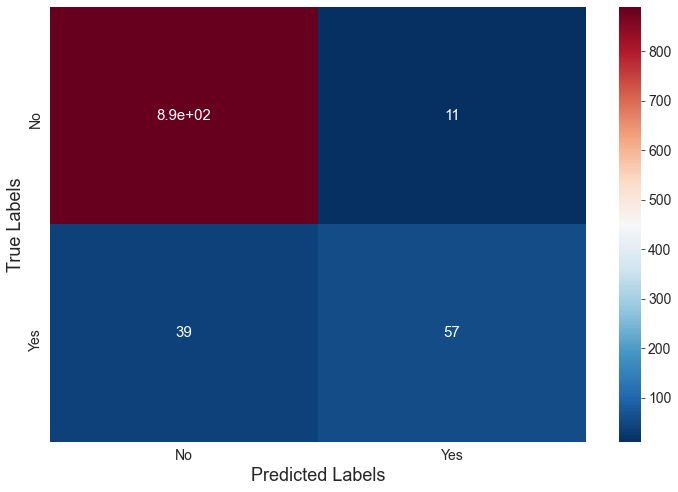



			Classification Report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       900
           1       0.84      0.59      0.70        96

    accuracy                           0.95       996
   macro avg       0.90      0.79      0.83       996
weighted avg       0.95      0.95      0.95       996



In [76]:
# Let's evaluate with Logistic Regression Model:

evaluate_model(X_tl,y_tl,log_model)

Training Score: 0.8918987341772152
Cross V Score:  0.8911406369362073  +/- 0.005834908943693366
Testing Score: 0.8694779116465864
Cross & Test Diff: 0.021662725289620877

 				Confusion Matrix 
				-----------------


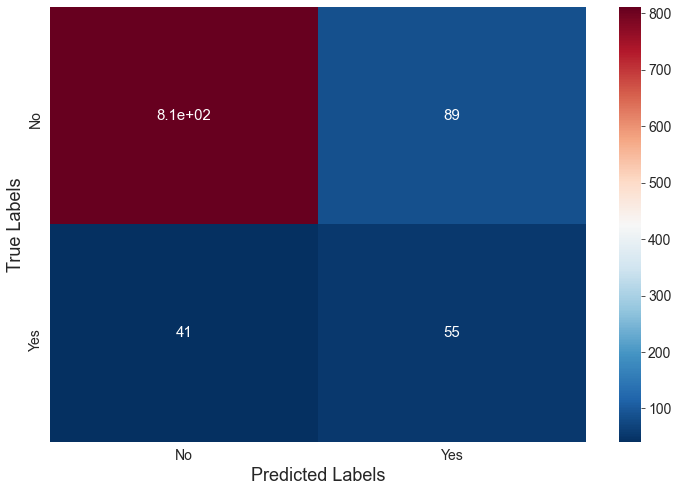



			Classification Report
               precision    recall  f1-score   support

           0       0.95      0.90      0.93       900
           1       0.38      0.57      0.46        96

    accuracy                           0.87       996
   macro avg       0.67      0.74      0.69       996
weighted avg       0.90      0.87      0.88       996



In [77]:
# Let's create an instance of Naive Bayes

evaluate_model(X_tl,y_tl,nb_model)

<b> Evaluation of the performance of both the models with method-3-> Under-sampling method, TomekLinks:</b><br>

Logistic Regression model is performing much better than Naive Bayes Model, where we can see the difference in the most basic metric, Accuracy, which is almost 8% higher for Logistic Regression model than Naive Bayes model. 

Then we can see the apparent difference in the classification report of both the models where Logistic Regression has outscored Naive Bayes in all the metrics like Precision, Recall and overall F1-score. We see that F1-score for Logistic Regression is 5% higher for majority class and a whopping 24% for the minority class.

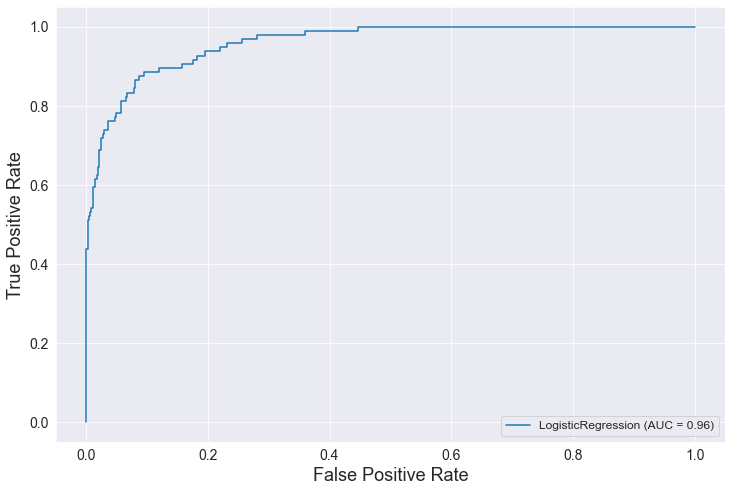

In [78]:
# Let's plot the roc-curve for our best performing model:

plot_roc_curve(log_model,X_test,y_test)

As we can see that we have got a very high area under the curve in the ROC curve, which is indicative that our model is a decent one.

<b>Now, let's first evaluate both of our models for combination of both sampling on training data:

Training Score: 0.9080923248053393
Cross V Score:  0.9083709492764389  +/- 0.003628099253381525
Testing Score: 0.8825301204819277
Cross & Test Diff: 0.025840828794511217

 				Confusion Matrix 
				-----------------


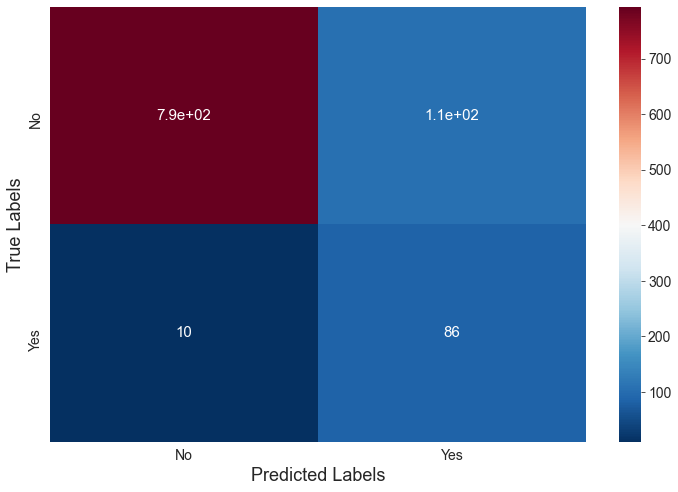



			Classification Report
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       900
           1       0.45      0.90      0.60        96

    accuracy                           0.88       996
   macro avg       0.72      0.89      0.76       996
weighted avg       0.94      0.88      0.90       996



In [79]:
# Let's evaluate with Logistic Regression Model:

evaluate_model(X_st,y_st,log_model)

Training Score: 0.8674916573971079
Cross V Score:  0.8681877390756608  +/- 0.005460076286670548
Testing Score: 0.8554216867469879
Cross & Test Diff: 0.012766052328672894

 				Confusion Matrix 
				-----------------


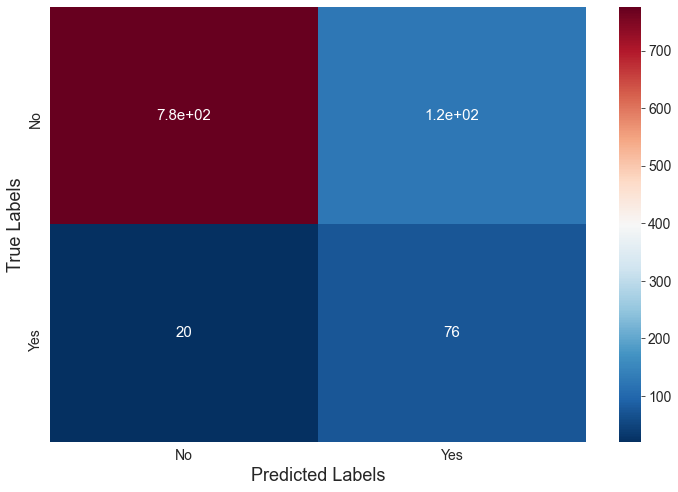



			Classification Report
               precision    recall  f1-score   support

           0       0.97      0.86      0.92       900
           1       0.38      0.79      0.51        96

    accuracy                           0.86       996
   macro avg       0.68      0.83      0.71       996
weighted avg       0.92      0.86      0.88       996



In [80]:
# Let's create an instance of Naive Bayes

evaluate_model(X_st,y_st,nb_model)

<b> Evaluation of the performance of both the models with method-4-> Combined sampling method, SMOTETomek:</b><br>

Logistic Regression model is performing much better than Naive Bayes Model, where we can see the difference in the most basic metric, Accuracy, which is almost 3% higher for Logistic Regression model than Naive Bayes model. 

Then we can see the apparent difference in the classification report of both the models where Logistic Regression has outscored Naive Bayes in all the metrics like Precision, Recall and overall F1-score. We see that F1-score for Logistic Regression is 2% higher for majority class and a whopping 6% for the minority class.


### Overall Evaluation of both the models for all the methods used above:

From the evaluation of all the models for all the methods, one thing is crytal clear that <b>Logistic Regression is the clear winner</b> in all the methods.

Secondly, the overall <b>best performing model till now is Logistic Regression model using our method-3, i.e., under-sampling method, TomekLinks.</b>

The closest near,which is our 2nd best performing model, is our Logistic Regression model using our method-1: Stratified Spliting method, which is just marginally varying in recall than our best performing model. 

<b>Note:</b> I also observed some interesting thing that when using simple stratified method and the under-sampling method, the precision of the model both for majority and minority are coming high but recall of the minority class is terribly lower than the recall of the majority class.

Whereas, while using over-sampling method in any way, whether only over-sampling or using over-sampling along with under-sampling (SMOTETomek), the recall of both majority and the minority classes are coming higher but the precision of the minority class is quite lower than the precision of the majority class. 

It's like two methods are reducing the Type-1 error in the model while the other two methods are reducing the Type-2 error in the model, but neither is reducing both the errors simultaneously. 

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------

Now, we have seen that using under-sampling technique, the best F1 score for the minority class that we are getting is 0.70. Specially, the model is struggling with Recall of the minority class, i.e. struggling to restrict the False Negatives, which is our main goal. 

Note that despite getting very high accuracies of 95%, we are struggling to solve our problem, which is mainly to predict our potential loan takers. That's what we call metric trap, where metrics like Accuracy give the signals that our model is really good but in actual, it isn't solving our problem. 

<b>So, to bring our True Positive Rate, i.e. recall, up, let's do a last try. </b>

Since we have seen that under-sampling method works. Let's build on that further.

Let's first segregate our data based on our target variable and then let's manually under-sample the majority class by randomly selecting rows from the majority class dataframe, equal to the minority class number of observations.

Then we will rejoin both the dataframes and perform our model building exercise. 

I am aware that this will cause a huge loss of information, but if it helps bringing our True Positive Rate up and help solving our problem, nothing could be better than that.

In [80]:
# Segregating the data based on target variable

df_loan = df[df['LoanOnCard'] == 1]
df_noloan = df[df['LoanOnCard'] == 0]

In [81]:
df_loan.shape # We have 480 observations in our minority class dataframe

(480, 15)

In [96]:
df_noloan = df_noloan.sample(n=480,axis=0,random_state=108)
# We are randomly selecting 480 observations from our majority class dataframe

In [97]:
df_new = pd.concat([df_loan,df_noloan],axis=0) # Rejoining both the dataframes

In [98]:
df_new.shape # Now we have 480 obervations of each class

(960, 15)

In [99]:
# Segregating predictor and target variables

X_new = df_new.drop(['Age','Mortgage','ID','ZipCode','LoanOnCard'],axis=1)
y_new = df_new['LoanOnCard']

In [100]:
# Spliting the data into training and testing sets

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, 
                                            y_new, test_size=0.2, random_state=108,stratify=y_new)

In [101]:
# Let's do scaling now:

X_train_new.iloc[:,:3] = mms.fit_transform(X_train_new.iloc[:,:3])
X_test_new.iloc[:,:3] = mms.transform(X_test_new.iloc[:,:3])

Training Score: 0.90234375
Cross V Score:  0.8984375  +/- 0.01275775907699572
Testing Score: 0.8802083333333334
Cross & Test Diff: 0.01822916666666663

 				Confusion Matrix 
				-----------------


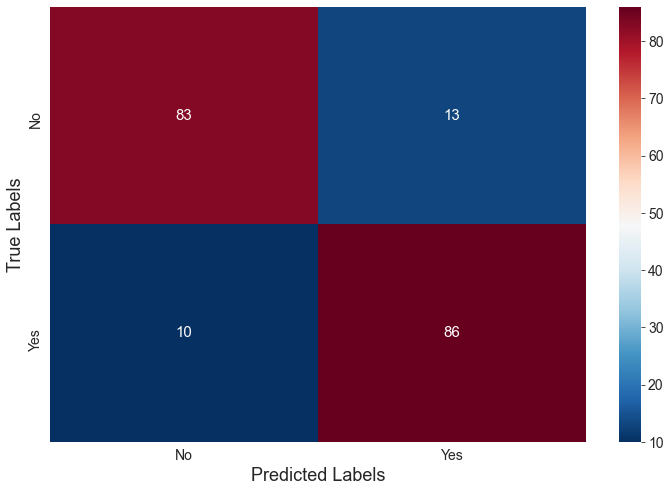



			Classification Report
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        96
           1       0.87      0.90      0.88        96

    accuracy                           0.88       192
   macro avg       0.88      0.88      0.88       192
weighted avg       0.88      0.88      0.88       192



In [102]:
# Let's evaluate with Logistic Regression Model:

evaluate_model(X_train_new,y_train_new,log_model,X_test_new,y_test_new)

Training Score: 0.8424479166666666
Cross V Score:  0.8411458333333334  +/- 0.0048719497223619025
Testing Score: 0.8125
Cross & Test Diff: 0.02864583333333337

 				Confusion Matrix 
				-----------------


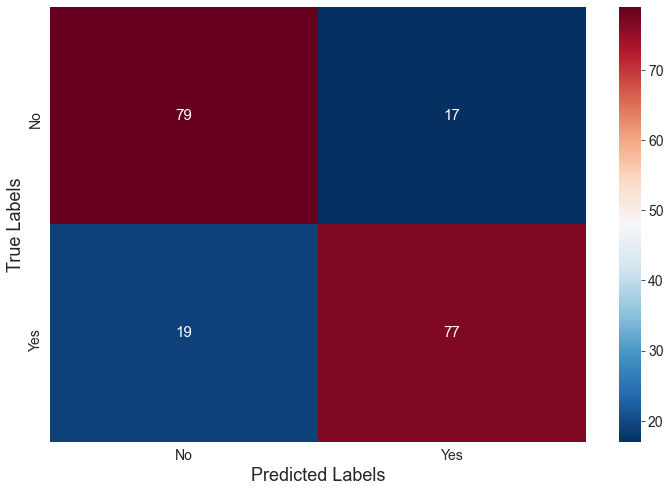



			Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81        96
           1       0.82      0.80      0.81        96

    accuracy                           0.81       192
   macro avg       0.81      0.81      0.81       192
weighted avg       0.81      0.81      0.81       192



In [103]:
# Let's create an instance of Naive Bayes

evaluate_model(X_train_new,y_train_new,nb_model,X_test_new,y_test_new)

<b> Evaluation of both the models using our manual under-sampling:</b><br>

Even here we can see that <b>Logistic Regression model is a clear winner</b> in all the parameters.

Here, we can also see in our Logistic Regression model that even though our accuracy has gone down slightly compared to the accuracy of under-sampling method (TomekLinks) used previously but <b>precision, recall and overall F1-score has improved considerably for our originally minority class</b>. It has actually brought the balance in predictions which we were aiming for. 

Hence, among all the models that we have build till now, in my opinion, this <b>Logistic Regression model with manual under-sampling is the best model</b>.

<b>Let's analyze the classification report of this logistic regression model in more detail:</b>


* <b>Precision</b>: This can be defined as the ratio of <b>True Positives to the Total Number of Predicted Positives</b>, i.e., 

$$ Precision = \frac {True Positives} {True Positives + False Positives} $$

So, from the above confusion matrix, we can find the respective values of True Positives and False Positives for all the classes and cross-verify our classification report:

$$ Precision_{No} = \frac {83} {83 + 10} = 0.89 $$
$$ Precision_{Yes} = \frac {86} {86 + 13} = 0.87 $$

* <b>Recall(or Sensitivity)</b>: It is defined as the ratio of <b>True Positives to the Actual Number of Positives</b>, i.e.,

$$ Recall = \frac {True Positives} {True Positives + False Negatives} $$

Similarly, we can cross verify our recall values of classification report with the confusion matrix:

$$ Recall_{No} = \frac {83} {83 + 13} = 0.86 $$
$$ Recall_{Yes} = \frac {86} {86 + 10} = 0.90 $$

* <b>F1-Score</b>: It is defined as the harmonic mean of Precision and Recall, i.e.,:

$$ F1 Score = \frac {2 * Precision * Recall} {Precision + Recall} $$ 

Similarly, this can also be cross-verified, after putting the values of Precision and Recall that we calculated above.

* Support column tells us how many observations were present of each class in our test set on which this model has performed the prediction and gave us this result. 

Precision and Recall, together give us the idea, how our model is performing overall and whether the motive which we are trying to achieve has been achieved or not. F1-Score simply sums up what Precision and Recall are conveying individually. These parameters are more important in this data-set than the accuracy scores.

Then comes our <b>Accuracy</b> parameter in our classification report, which we have already seen before we even built our confusion matrix. Let's now first understand what is accuracy:

* <b>Accuracy</b>: It is defined as the ratio of the True Predictions to the overall predictions by the models, i.e,:

$$ Accuracy = \frac {True Positives + True Negatives} {True Positives + True Negatives + False Positives + False Negatives}$$

Here, we can see that there are two averages, which are also accuracies:
* Macro Average: This is the uniform average/accuracy without taking into consideration the weights of each class in predictions.

* Weighted Average : This is the weighted average/accuracy where we have taken into consideration the weights of each class in predictions. 



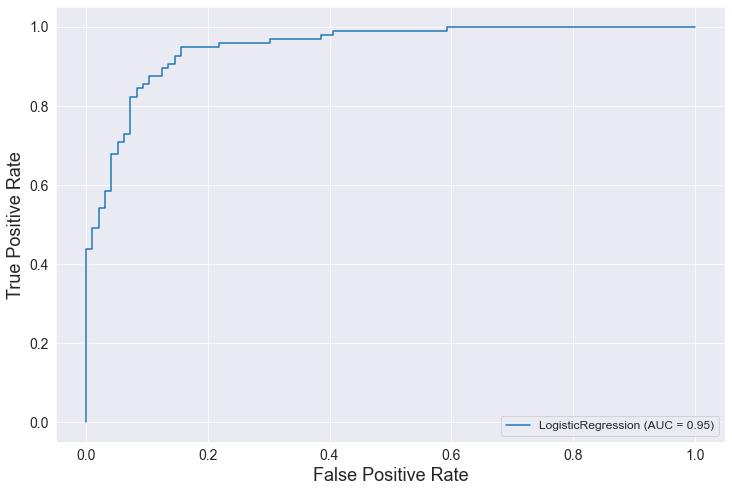

In [104]:
# Let's plot our roc-curve for this:

plot_roc_curve(log_model,X_test_new,y_test_new)

Here too, we can see that Arean Under the Curve of the ROC curve has improved, which is indicative that this model is performing better than all the other ones, that we have tried above.

Let's us further try to tune the hyperparameters of Logistic Regression model by tuning the penalty parameter using GridsearchCV and see if the result gets better or not. 

In [100]:
penalty = ['l1','l2'] # Let's check Lasso and Ridge regularizations methods
C = [0.001,0.01,0.1,1,10,100] # This is the inverse of regularization parameter, lambda.
random_state = [108] # Let's keep the random state uniform

# Collecting all these parameters in parameter grid 
param_grid = {'log_model__penalty':penalty,'log_model__C':C,"log_model__random_state":random_state}

In [93]:
#Let's make sure that the intenal cross-validation splits in GridSearchCV are also stratified

s_split = StratifiedShuffleSplit(n_splits=5,test_size=0.2,random_state=108)

In [93]:
# Let's create an instance of GridSearchCV and let's keep the scoring parameter= 'F1'

grid_model = GridSearchCV(log_model,param_grid=param_grid,scoring='accuracy',cv=s_split)

Training Score: 0.90234375
Cross V Score:  0.90234375  +/- 0.00637887953849786
Testing Score: 0.8802083333333334
Cross & Test Diff: 0.02213541666666663

 				Confusion Matrix 
				-----------------


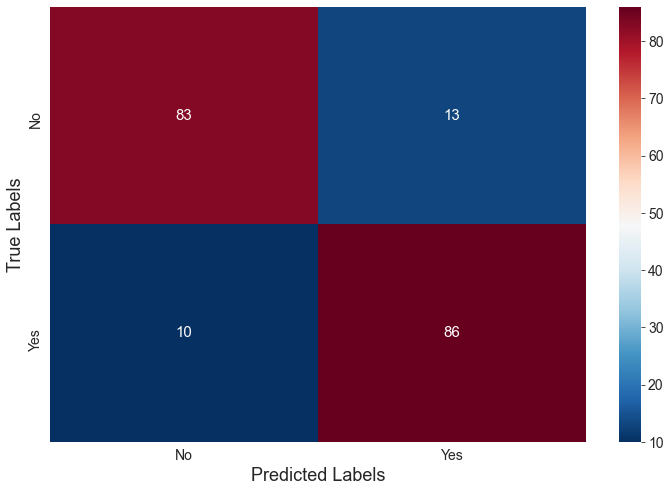



			Classification Report
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        96
           1       0.87      0.90      0.88        96

    accuracy                           0.88       192
   macro avg       0.88      0.88      0.88       192
weighted avg       0.88      0.88      0.88       192



In [105]:
# Let's evaluate our manually under-sampled data on this model

evaluate_model(X_train_new,y_train_new,grid_model,X_test_new,y_test_new)

In [95]:
grid_model.best_params_ # The best parameters which help us reach this score in the gridsearchcv

{'C': 1, 'penalty': 'l2', 'random_state': 108}

As we can see that the default parameters with which we trained our earlier model turns our to be the best one. 

Hence, this tuning exercise doesn't yield much results.

<a id='6'></a>
## 6. Conclusion and improvisation:

The problem statement says the bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.

<b>With the imbalanced class data, the precise predictions were difficult. Yet from the subset of the data, I was able to do some decent predictions with nearly 90% accuracy, precision and sensitivity. </b>

Highly imbalanced class data-sets like this one are really tricky ones where relying on just a single metric like Accuracy could give a false sense of goodness of the model. Hence, we must look for other metrics like Precision, Recall and overall F1-score, which could give the exact picture of the situation at hand. 

Hence, even though I compromised on the accuracy scores and even allowed some information loss due to under-sampling, I was able to build a balanced model which would give the predictions of both majority and minority class with equal precision and sensitivity. 

This model will surely help the bank to know who are their potential loan takers and hopefully, they would be able to target those customers to increase their borrowers' base. 

The only improvisation that I did was making Mortgage a categorical column from the continuous one, since more than 70% values in Mortgage belonged to just one value, which is 0.<br>
Next improvisation I made was not considering Age column since it was perfectly collinear with the CustomerSince feature. 

## Suggestions:

<b>Quality</b>: Quality of the data seems pretty decent since except for just 20 missing values, rest were in place and with the right data-types. The quality of the data can also be deduced from the fact that despite using just 960 observations out of 5000 total observations, I was able to build a high performing model.
My only suggestion in this is that along with ZipCode, if the data collection team could also collect the district or state of the customers, that would certainly help in knowing in which districts or states, customers take more loans and hence, could narrow down their region of targeting of customers. 

<b>Quantity</b>: Even though the quantity of the data was sufficient to build a good model, the data was imbalanced. Hence, I only used a small subset of the entire data to build a model. But this is not the fault of the data-collection team since it is not in their hands. Plus, it is always beneficial to collect more and more data. So, my only suggestion would be to collect more and more data. 

<b>Variety</b>: We have just dealt with the structured tabular data in our model building process and used a supervised learning method which deals with only structured data. But as far as variety of the data is concerned, it is always helpful to collect more and more data in any form that we could. Like, it may be helpful if the data collection team could collect documents of employment or customers' social media activity, which could give an insight of their living and spending habits and then we would be able to use models which could deal with such unstructured data as well and hopefully would be able to do better predictions than we are already doing.

<b>Velocity</b>: Since we are not doing any real-time analysis. So it would be difficult to comment on the velocity of the data. But as far as the entire process is concerned, it is always beneficial to collect the data as fast as possible, so that we could come up with better strategies to target the customers in the current situation. Data would be of no use if it gets outdated and then it would be difficult to target customers today based on outdated data.

<b>Veracity</b>: Since the data has been provided by the bank itself, hence the data is completely authentic. As far as noise and abnormalities in the data are concerned, the abnormalities that we saw in the data is not because of the inauthentic data but due to their own nature, like the skewness in MonthlyAverageSpend, HighestSpend and Mortgage. Overall, there were no abnormalities. 